# Data Analysis and Visualisations

### Business Questions:

* What kind of tourism activity generates the highest income for Scotland?
* Which kind of activity generates the most visits to sites?
* Is there a particular key demographic of visitors we should be focusing on? 
    * Who spends the most? 
    * Who visits the most?
* What type of locations receive the most visits?
    * What kinds of locations do people spend the most in?
* Is there a particular method of travel our visitors arrive by?
    * Some of our locations are remote and not easily accessible by public transport, so this would be good information to have.
* When looking at regional tourism, what insights can we gain?
    * Where are our visitors from?
    * How do they differ in the money they spend, nights they spend in Scotland, or number of visits they do?
* What type of accommodation is most popular?
    * Is there a difference by location?
* How have general tourism rates changed over time?
* Is there any way to predict spending and visits for Visit Scotland?

### Load in pandas, seaborn and data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

regional_tourism = pd.read_csv('clean_data/regional_tourism.csv')

accommodation_occupancy = pd.read_csv('clean_data/accommodation_occupancy.csv')

activities = pd.read_csv('clean_data/activities.csv')

demographics = pd.read_csv('clean_data/demographics.csv')

locations = pd.read_csv('clean_data/location.csv')

transport = pd.read_csv('clean_data/transport.csv')

international = pd.read_csv('clean_data/international.csv')

# Question 1

##### What kind of tourism activity generates the highest income for Scotland?

## TOTAL EXPENDITURE - ACTIVITY TYPE

In [3]:
(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

activity_type
Drinking & Dining          20549
Leisure activity           11587
Shopping                   10222
Visiting family/friends    10142
Other                       7084
Live event                  5481
Entertainment               4240
Tourist attraction          3251
Excursions                  2721
Name: value, dtype: int64

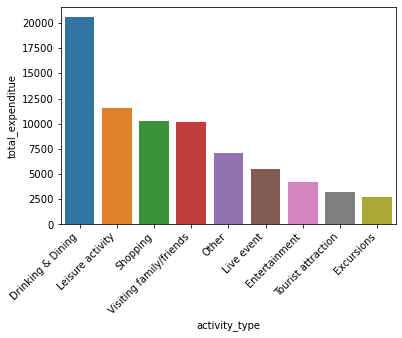

In [4]:
sns.barplot(data=(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditue')
),
            x='activity_type',
            y='total_expenditue')

plt.xticks(rotation=45, ha='right')

plt.show()

In [5]:
total_activity = (
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['year', 'activity_type'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_year')
)

total_activity

year       activity_type  total_expenditure_per_year
0   2017   Drinking & Dining                        3506
1   2019   Drinking & Dining                        3189
2   2018   Drinking & Dining                        3109
3   2016   Drinking & Dining                        2865
4   2014   Drinking & Dining                        2858
..   ...                 ...                         ...
58  2018          Excursions                         362
59  2015  Tourist attraction                         345
60  2016          Excursions                         330
61  2013          Excursions                         312
62  2015          Excursions                         269

[63 rows x 3 columns]

In [6]:
(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure') & (activities.year == 2017), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_year')
)

activity_type  total_expenditure_per_year
0        Drinking & Dining                        3506
1         Leisure activity                        2323
2  Visiting family/friends                        1818
3                 Shopping                        1561
4                    Other                        1396
5               Live event                         945
6            Entertainment                         903
7       Tourist attraction                         742
8               Excursions                         443

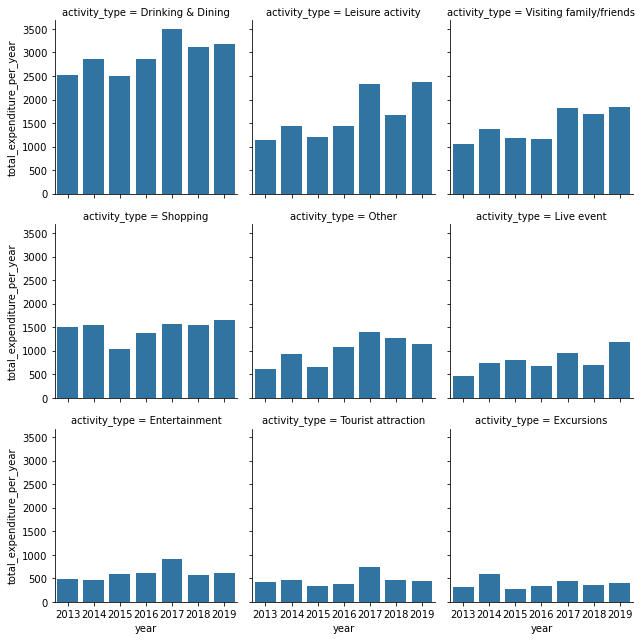

In [7]:
grid_total_activity = sns.FacetGrid(total_activity, col='activity_type', col_wrap=3)
grid_total_activity.map_dataframe(sns.barplot, x='year', y='total_expenditure_per_year')

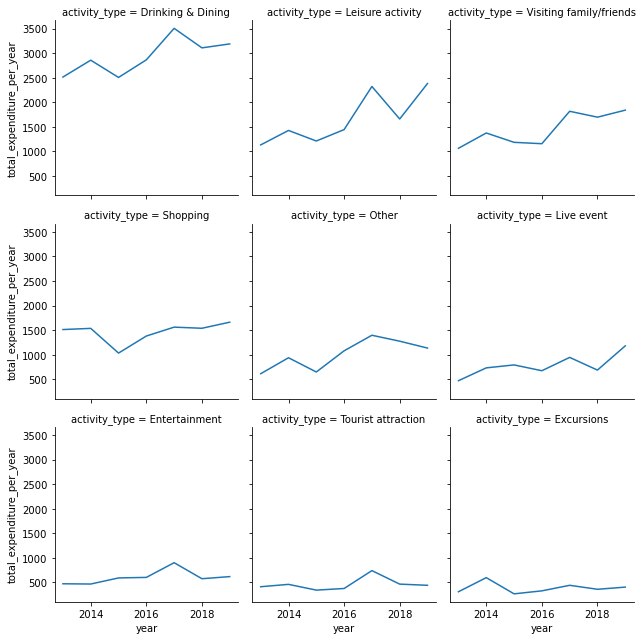

In [8]:
grid_total_activity_line = sns.FacetGrid(total_activity, col='activity_type', col_wrap=3)
grid_total_activity_line.map_dataframe(sns.lineplot, x='year', y='total_expenditure_per_year')

## TOTAL EXPENDITURE - TOURISM_ACTIVITY

In [9]:
(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('tourism_activity')
    .value
    .sum()
    .sort_values(ascending=False)
)

tourism_activity
Dining out                  13409
Shopping                    10222
Visiting family/friends     10142
Night out                    7140
Outdoor leisure activity     5971
General day out              5476
Entertainment                4240
Visitor attraction           3251
Live sporting event          3131
Excursions                   2721
Indoor leisure activity      2354
Public event                 2350
Sport participation          2210
Private event                1608
Spa day                      1052
Name: value, dtype: int64

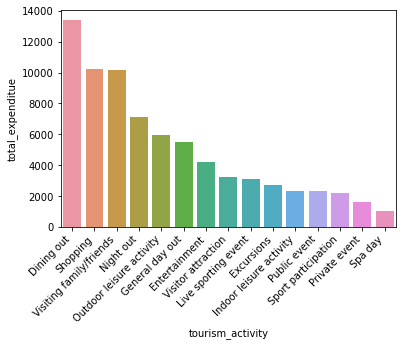

In [10]:
sns.barplot(data=(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('tourism_activity')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditue')
),
            x='tourism_activity',
            y='total_expenditue')

plt.xticks(rotation=45, ha='right')

plt.show()

In [11]:
total_toursim = (
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['year', 'tourism_activity'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_year')
)

total_toursim

year tourism_activity  total_expenditure_per_year
0    2017       Dining out                        2208
1    2019       Dining out                        2078
2    2014       Dining out                        1966
3    2018       Dining out                        1959
4    2016       Dining out                        1892
..    ...              ...                         ...
100  2015          Spa day                          87
101  2018          Spa day                          87
102  2013    Private event                          85
103  2014          Spa day                          71
104  2016          Spa day                          69

[105 rows x 3 columns]

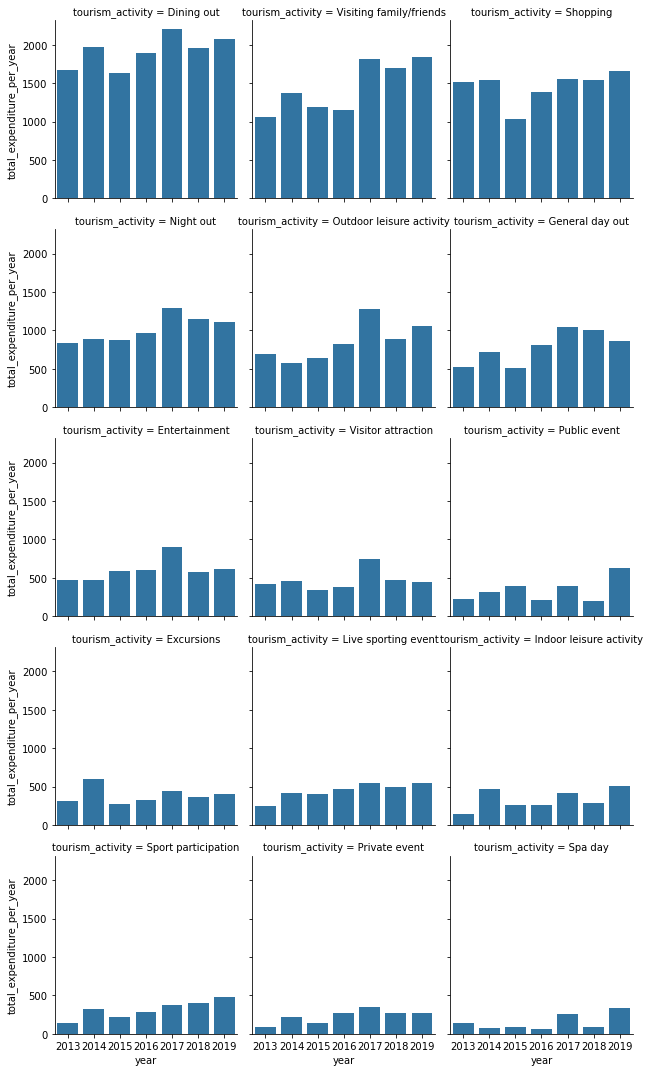

In [12]:
grid_total_tourism = sns.FacetGrid(total_toursim, col='tourism_activity', col_wrap=3)
grid_total_tourism.map_dataframe(sns.barplot, x='year', y='total_expenditure_per_year')

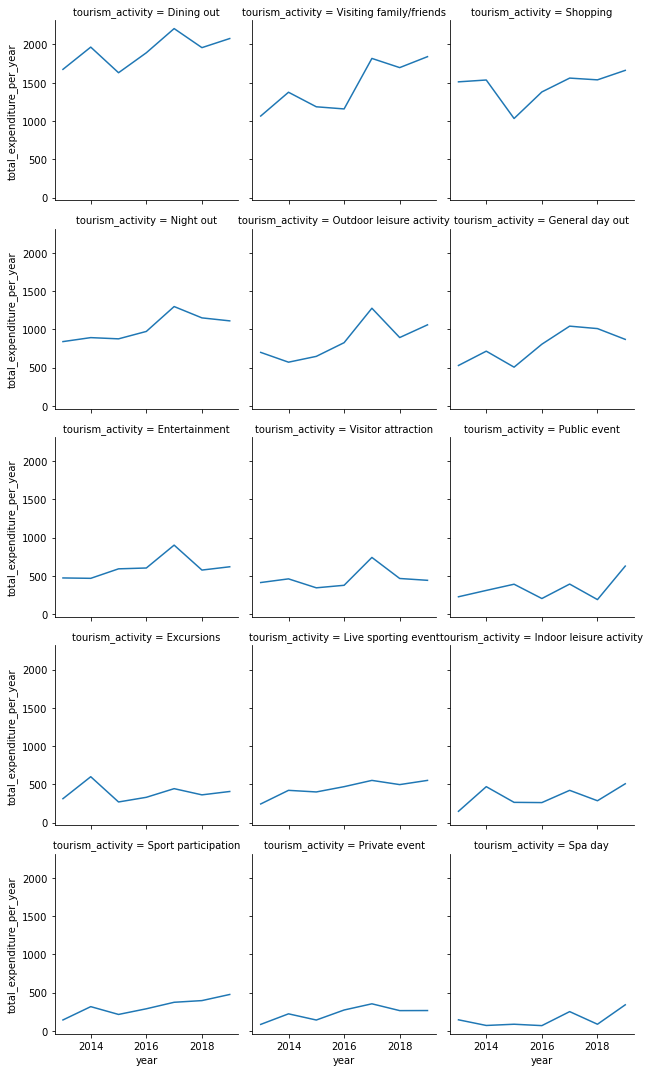

In [13]:
grid_total_tourism = sns.FacetGrid(total_toursim, col='tourism_activity', col_wrap=3)
grid_total_tourism.map_dataframe(sns.lineplot, x='year', y='total_expenditure_per_year')

## MEAN EXPENDITURE - ACTIVITY_TYPE

In [14]:
(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('activity_type')
    .value
    .mean()
    .sort_values(ascending=False)
)

activity_type
Drinking & Dining          1467.785714
Shopping                   1460.285714
Visiting family/friends    1448.857143
Entertainment               605.714286
Other                       506.000000
Tourist attraction          464.428571
Leisure activity            413.821429
Live event                  391.500000
Excursions                  388.714286
Name: value, dtype: float64

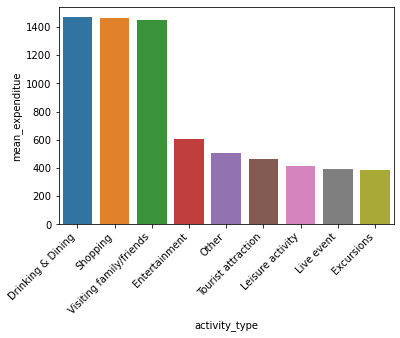

In [15]:
sns.barplot(data=(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('activity_type')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='mean_expenditue')
),
            x='activity_type',
            y='mean_expenditue')

plt.xticks(rotation=45, ha='right')

plt.show()

**MEAN ACTIVITY EXPENDITURE PER YEAR**

In [16]:
(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['activity_type', 'year'])
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='mean_expenditure_per_year')
    .head(20)
)

activity_type  year  mean_expenditure_per_year
0   Visiting family/friends  2019                     1841.0
1   Visiting family/friends  2017                     1818.0
2         Drinking & Dining  2017                     1753.0
3   Visiting family/friends  2018                     1698.0
4                  Shopping  2019                     1662.0
5         Drinking & Dining  2019                     1594.5
6                  Shopping  2017                     1561.0
7         Drinking & Dining  2018                     1554.5
8                  Shopping  2018                     1538.0
9                  Shopping  2014                     1536.0
10                 Shopping  2013                     1512.0
11        Drinking & Dining  2016                     1432.5
12        Drinking & Dining  2014                     1429.0
13                 Shopping  2016                     1380.0
14  Visiting family/friends  2014                     1376.0
15        Drinking & Dining  2013                     1257.5
16        Drinking & Dining  2015                     1253.5
17  Visiting family/friends  2015                     1186.0
18  Visiting family/friends  2016                     1158.0
19  Visiting family/friends  2013                     1065.0

In [17]:
mean_activity = (
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['year', 'activity_type'])
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='mean_expenditure_per_year')
)

mean_activity

year            activity_type  mean_expenditure_per_year
0   2019  Visiting family/friends                    1841.00
1   2017  Visiting family/friends                    1818.00
2   2017        Drinking & Dining                    1753.00
3   2018  Visiting family/friends                    1698.00
4   2019                 Shopping                    1662.00
..   ...                      ...                        ...
58  2013                    Other                     306.50
59  2015         Leisure activity                     303.25
60  2013         Leisure activity                     283.50
61  2015               Excursions                     269.00
62  2013               Live event                     235.50

[63 rows x 3 columns]

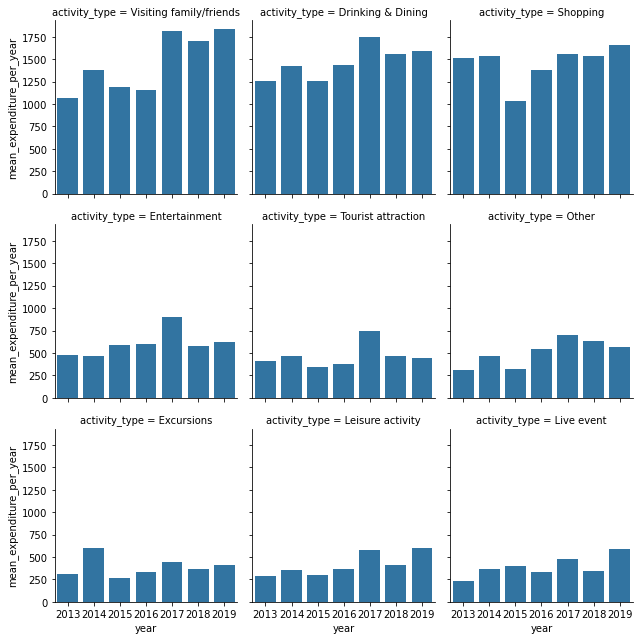

In [18]:
grid_mean_activity = sns.FacetGrid(mean_activity, col='activity_type', col_wrap=3)
grid_mean_activity.map_dataframe(sns.barplot, x='year', y='mean_expenditure_per_year')

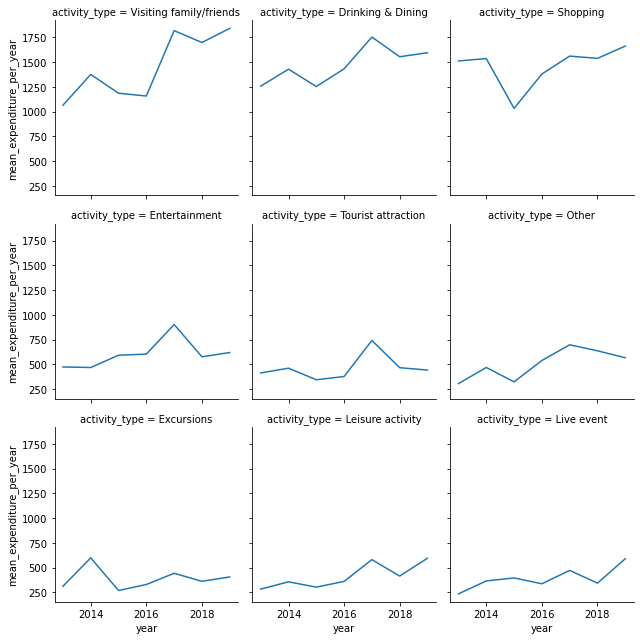

In [19]:
grid_mean_activity_line = sns.FacetGrid(mean_activity, col='activity_type', col_wrap=3)
grid_mean_activity_line.map_dataframe(sns.lineplot, x='year', y='mean_expenditure_per_year')

##### Which kind of activity generates the most visits to sites?

## TOTAL VISITS - ACTIVITY TYPE

In [20]:
(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

activity_type
Drinking & Dining          378
Leisure activity           320
Visiting family/friends    315
Other                      182
Live event                 130
Shopping                   125
Entertainment               89
Tourist attraction          87
Excursions                  68
Name: value, dtype: int64

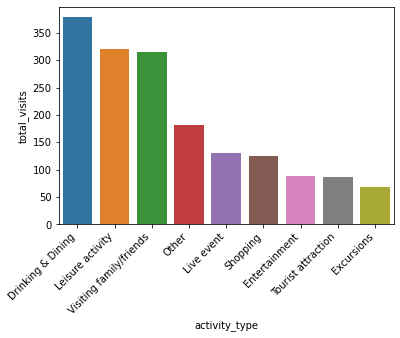

In [21]:
sns.barplot(data=(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='activity_type',
            y='total_visits')

plt.xticks(rotation=45, ha='right')

plt.show()

In [22]:
total_activity_visits = (
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['year', 'activity_type'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits_per_year')
)

total_activity_visits

year      activity_type  total_visits_per_year
0   2017  Drinking & Dining                     62
1   2017   Leisure activity                     58
2   2018  Drinking & Dining                     57
3   2016  Drinking & Dining                     56
4   2015  Drinking & Dining                     54
..   ...                ...                    ...
58  2014         Excursions                     10
59  2015         Excursions                      9
60  2019         Excursions                      9
61  2013         Excursions                      9
62  2017         Excursions                      9

[63 rows x 3 columns]

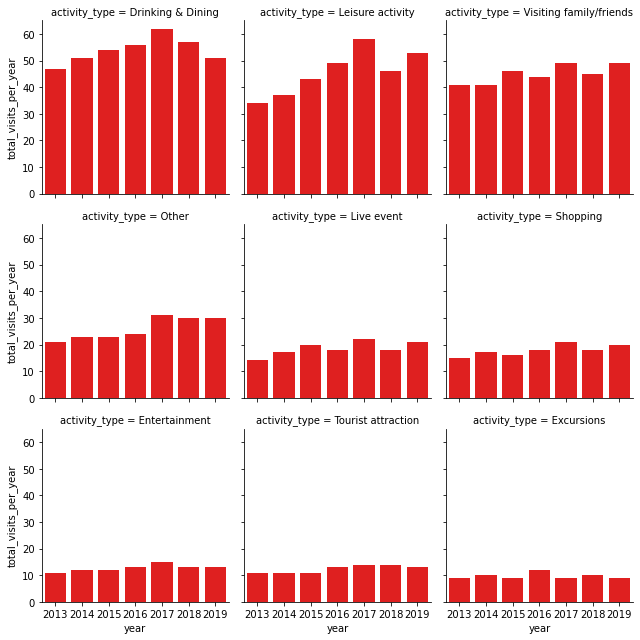

In [23]:
grid_total_activity_visits = sns.FacetGrid(total_activity_visits, col='activity_type', col_wrap=3)
grid_total_activity_visits.map_dataframe(sns.barplot, x='year', y='total_visits_per_year', color='red')

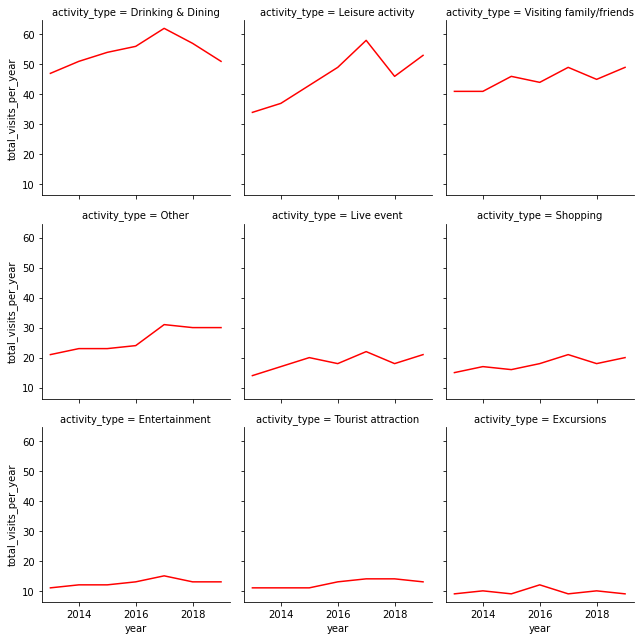

In [24]:
grid_total_activity_visits = sns.FacetGrid(total_activity_visits, col='activity_type', col_wrap=3)
grid_total_activity_visits.map_dataframe(sns.lineplot, x='year', y='total_visits_per_year', color='red')

## MEAN VISITS - ACTIVITY TYPE

In [25]:
(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('activity_type')
    .value
    .mean()
    .sort_values(ascending=False)
)

activity_type
Visiting family/friends    45.000000
Drinking & Dining          27.000000
Shopping                   17.857143
Other                      13.000000
Entertainment              12.714286
Tourist attraction         12.428571
Leisure activity           11.428571
Excursions                  9.714286
Live event                  9.285714
Name: value, dtype: float64

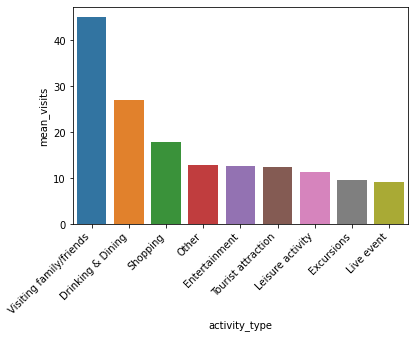

In [26]:
sns.barplot(data=(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('activity_type')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='mean_visits')
),
            x='activity_type',
            y='mean_visits')

plt.xticks(rotation=45, ha='right')

plt.show()

In [27]:
mean_activity_visits = (
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['year', 'activity_type'])
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='mean_visits_per_year')
)

mean_activity_visits

year            activity_type  mean_visits_per_year
0   2019  Visiting family/friends                  49.0
1   2017  Visiting family/friends                  49.0
2   2015  Visiting family/friends                  46.0
3   2018  Visiting family/friends                  45.0
4   2016  Visiting family/friends                  44.0
..   ...                      ...                   ...
58  2015               Excursions                   9.0
59  2016               Live event                   9.0
60  2013         Leisure activity                   8.5
61  2014               Live event                   8.5
62  2013               Live event                   7.0

[63 rows x 3 columns]

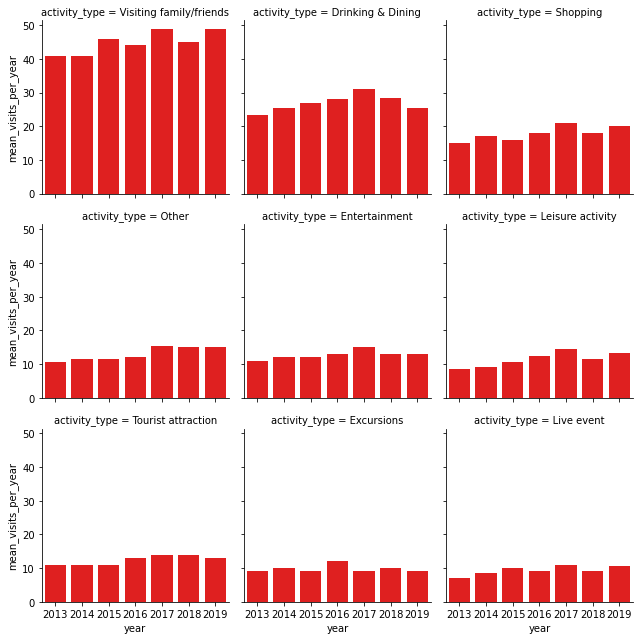

In [28]:
grid_mean_activity_visits = sns.FacetGrid(mean_activity_visits, col='activity_type', col_wrap=3)
grid_mean_activity_visits.map_dataframe(sns.barplot, x='year', y='mean_visits_per_year', color='red')

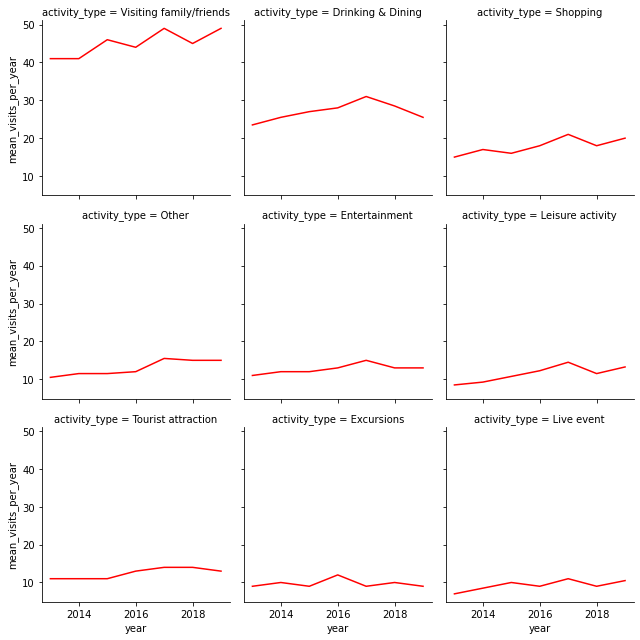

In [29]:
grid_mean_activity_visits = sns.FacetGrid(mean_activity_visits, col='activity_type', col_wrap=3)
grid_mean_activity_visits.map_dataframe(sns.lineplot, x='year', y='mean_visits_per_year', color='red')

## TOTAL VISITS - TOURISM_ACTIVITY

In [30]:
(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('tourism_activity')
    .value
    .sum()
    .sort_values(ascending=False)
)

tourism_activity
Visiting family/friends     315
Dining out                  241
Outdoor leisure activity    188
General day out             147
Night out                   137
Shopping                    125
Entertainment                89
Visitor attraction           87
Live sporting event          77
Excursions                   68
Indoor leisure activity      62
Public event                 53
Sport participation          51
Private event                35
Spa day                      19
Name: value, dtype: int64

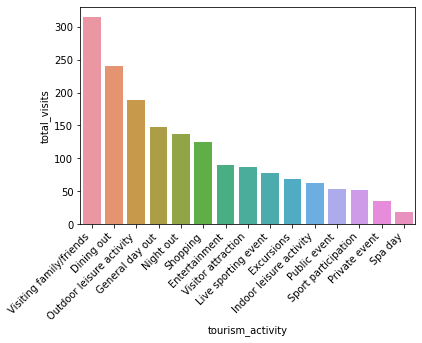

In [31]:
sns.barplot(data=(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('tourism_activity')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='tourism_activity',
            y='total_visits')

plt.xticks(rotation=45, ha='right')

plt.show()

In [32]:
total_tourism_visits = (
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['year', 'tourism_activity'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits_per_year')
)

total_tourism_visits

year         tourism_activity  total_visits_per_year
0    2019  Visiting family/friends                     49
1    2017  Visiting family/friends                     49
2    2015  Visiting family/friends                     46
3    2018  Visiting family/friends                     45
4    2016  Visiting family/friends                     44
..    ...                      ...                    ...
100  2018                  Spa day                      3
101  2014                  Spa day                      2
102  2016                  Spa day                      2
103  2015                  Spa day                      2
104  2013                  Spa day                      1

[105 rows x 3 columns]

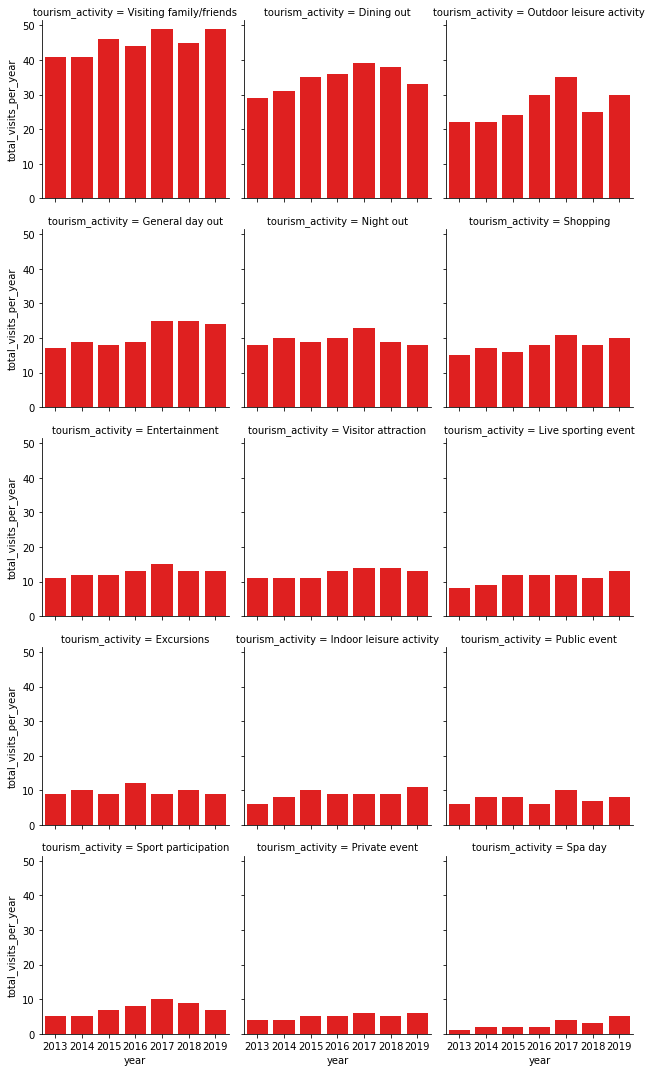

In [33]:
grid_total_tourism_visits = sns.FacetGrid(total_tourism_visits, col='tourism_activity', col_wrap=3)
grid_total_tourism_visits.map_dataframe(sns.barplot, x='year', y='total_visits_per_year', color='red')

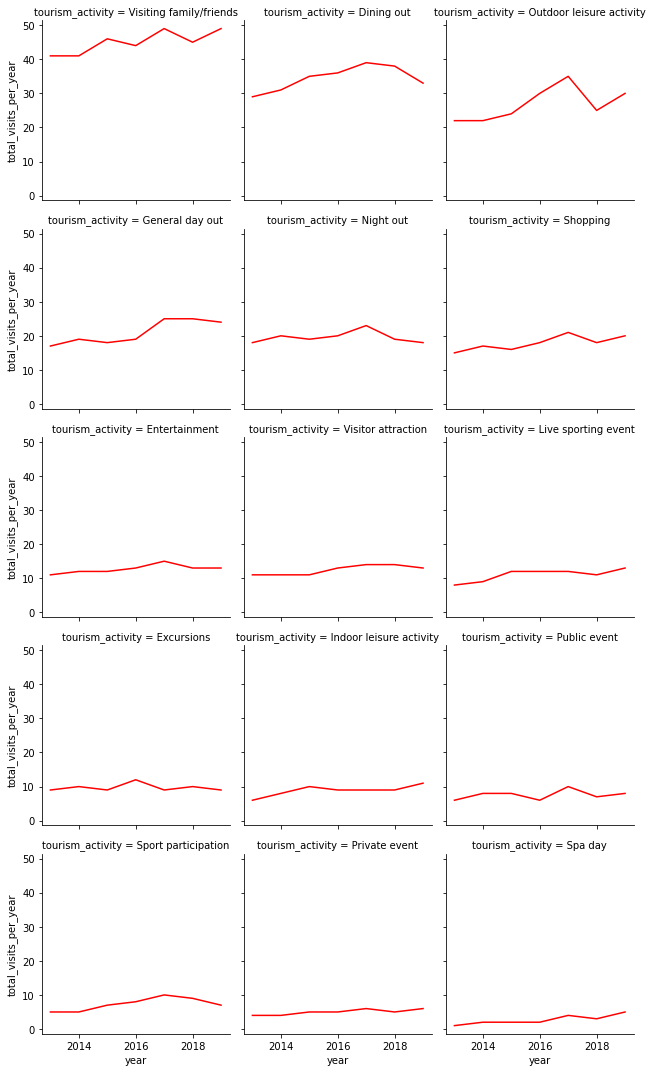

In [34]:
grid_total_tourism_visits = sns.FacetGrid(total_tourism_visits, col='tourism_activity', col_wrap=3)
grid_total_tourism_visits.map_dataframe(sns.lineplot, x='year', y='total_visits_per_year', color='red')

## Look at the total expenditure across the years for activities

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

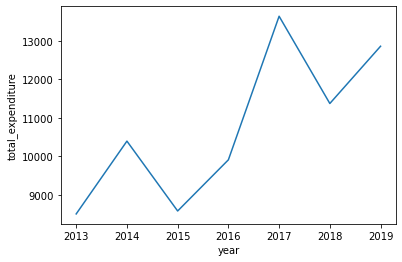

In [35]:
sns.lineplot(data=(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
             x='year',
             y='total_expenditure')

## Look at the total visits across the years for activities 

<AxesSubplot:xlabel='year', ylabel='total_visits'>

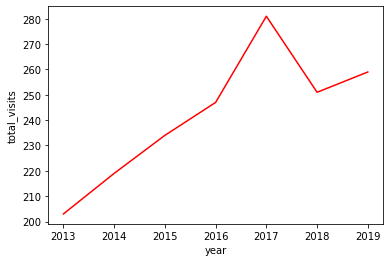

In [36]:
sns.lineplot(data=(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
             x='year',
             y='total_visits',
            color='red')

## Look at the expenditure for live events

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

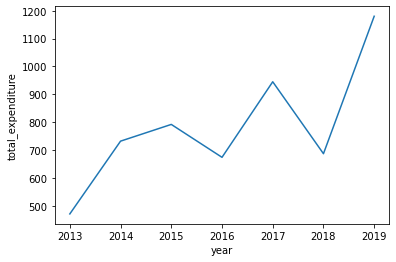

In [37]:
sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Live event') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
             x='year',
             y='total_expenditure')

## Look at number of visits for live events

<AxesSubplot:xlabel='year', ylabel='total_visits'>

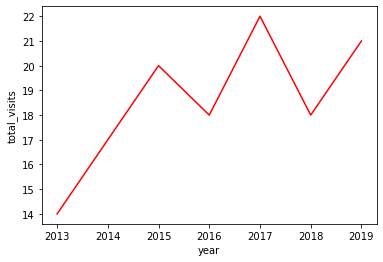

In [38]:
sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Live event') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
             x='year',
             y='total_visits',
            color='red')

## Look at the expenditure for drinking and dining

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

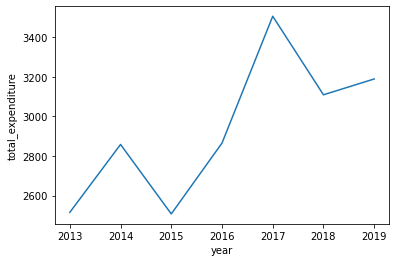

In [39]:
sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Drinking & Dining') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
             x='year',
             y='total_expenditure')

## Look at the visits for drinking and dining

<AxesSubplot:xlabel='year', ylabel='total_visits'>

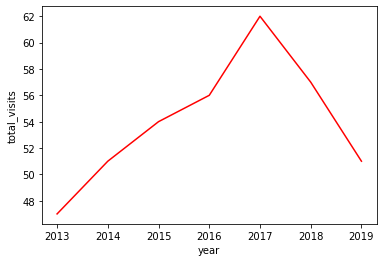

In [40]:
sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Drinking & Dining') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
             x='year',
             y='total_visits',
            color='red')

## Look at the expenditure for visiting family/friends

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

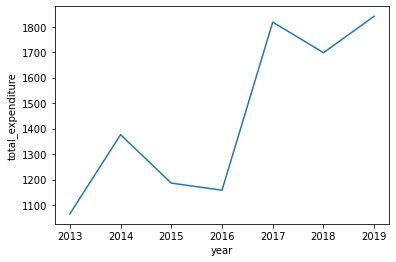

In [41]:
sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Visiting family/friends') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
             x='year',
             y='total_expenditure')

## Look at the visits for visiting family/friends

<AxesSubplot:xlabel='year', ylabel='total_visits'>

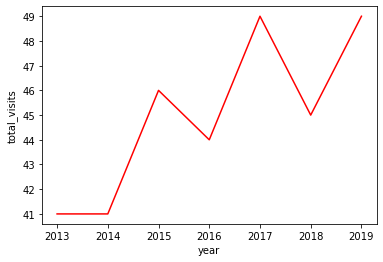

In [42]:
sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Visiting family/friends') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
             x='year',
             y='total_visits',
            color='red')

## Look at the expenditure for leisure activities

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

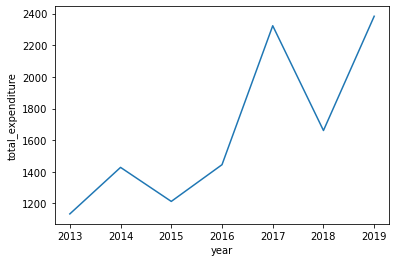

In [43]:
sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Leisure activity') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
             x='year',
             y='total_expenditure')

## Look at the visits for leisure activities

<AxesSubplot:xlabel='year', ylabel='total_visits'>

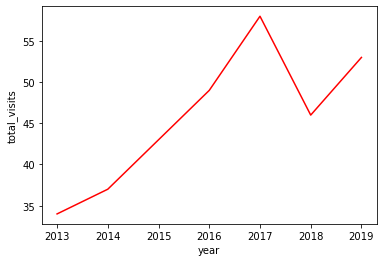

In [44]:
sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Leisure activity') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
             x='year',
             y='total_visits',
            color='red')

## Look at the expenditure for shopping

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

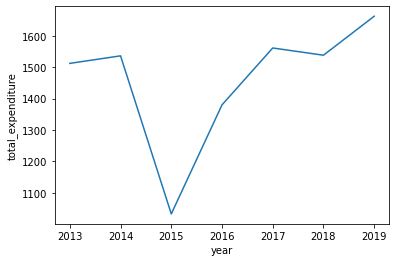

In [45]:
sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Shopping') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
             x='year',
             y='total_expenditure')

## Look at the visits for shopping

<AxesSubplot:xlabel='year', ylabel='total_visits'>

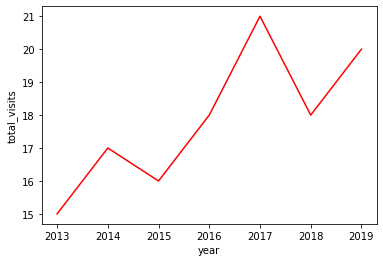

In [46]:
sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Shopping') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
             x='year',
             y='total_visits',
            color='red')

<AxesSubplot:xlabel='visit', ylabel='expenditure'>

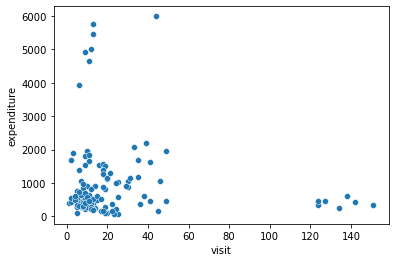

In [47]:
sns.scatterplot(
               x=activities
    .loc[(activities.breakdown_of_domestic_tourism == 'Visits'), 'value']
    .reset_index(name='visit')
    .visit,
               y=activities
    .loc[(activities.breakdown_of_domestic_tourism == 'Expenditure'), 'value']
    .reset_index(name='expenditure')
    .expenditure
)

Text(0.5, 1.0, 'CLUSTERING????')

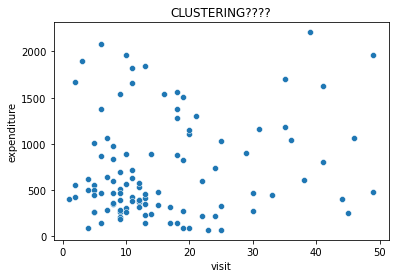

In [48]:
sns.scatterplot(
               x=activities
    .loc[(activities.breakdown_of_domestic_tourism == 'Visits') & (activities.tourism_activity != 'All'), 'value']
    .reset_index(name='visit')
    .visit,
               y=activities
    .loc[(activities.breakdown_of_domestic_tourism == 'Expenditure') & (activities.tourism_activity != 'All'), 'value']
    .reset_index(name='expenditure')
    .expenditure
)

plt.title('CLUSTERING????')

<AxesSubplot:xlabel='visit', ylabel='expenditure'>

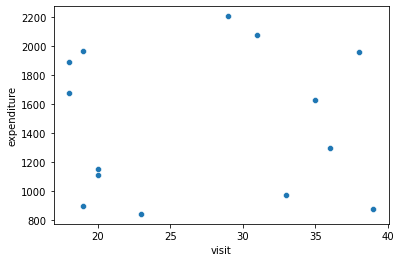

In [49]:
sns.scatterplot(
               x=activities
    .loc[(activities.breakdown_of_domestic_tourism == 'Visits') & (activities.activity_type == 'Drinking & Dining'), 'value']
    .reset_index(name='visit')
    .visit,
               y=activities
    .loc[(activities.breakdown_of_domestic_tourism == 'Expenditure') & (activities.activity_type == 'Drinking & Dining'), 'value']
    .reset_index(name='expenditure')
    .expenditure
)

# Question 2

##### Is there a particular key demographic of visitors we should be focusing on?
##### Who spends the most?
##### Who visits the most?

<AxesSubplot:xlabel='visit', ylabel='expenditure'>

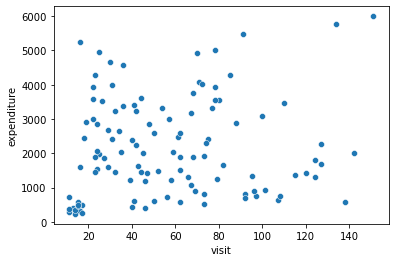

In [50]:
sns.scatterplot(
               x=demographics
    .loc[(demographics.breakdown_of_domestic_tourism == 'Visits') & (demographics.age == 'All'), 'value']
    .reset_index(name='visit')
    .visit,
               y=demographics
    .loc[(demographics.breakdown_of_domestic_tourism == 'Expenditure') & (demographics.age == 'All'), 'value']
    .reset_index(name='expenditure')
    .expenditure
)

## Create column not including 'All'

In [51]:
demographics = (
    demographics
    .assign(demo = np.where(demographics.age != 'All', demographics.age,
                   np.where(demographics.marital_status != 'All', demographics.marital_status,
                   np.where(demographics.gender != 'All', demographics.gender,
                   np.where(demographics.employment_status != 'All', demographics.employment_status,
                   np.where(demographics.children != 'All', demographics.children,
                   np.where(demographics.access_to_car != 'All', demographics.access_to_car,
                   np.where(demographics.social_grade != 'All', demographics.social_grade, 'All')))))))
           )
)

demographics

year                 units  value breakdown_of_domestic_tourism  \
0    2013        Million Visits     22                        Visits   
1    2013        Million Visits     58                        Visits   
2    2016        Million Visits     23                        Visits   
3    2019        Million Visits     56                        Visits   
4    2015        Million Visits     52                        Visits   
..    ...                   ...    ...                           ...   
303  2019  million pounds (GBP)    715                   Expenditure   
304  2018        Million Visits     15                        Visits   
305  2015        Million Visits     15                        Visits   
306  2013        Million Visits     46                        Visits   
307  2016        Million Visits     11                        Visits   

             age marital_status gender       employment_status children  \
0    45-54 years            All    All                     All      All   
1            All            All   Male                     All      All   
2    25-34 years            All    All                     All      All   
3            All    Not Married    All                     All      All   
4            All    Not Married    All                     All      All   
..           ...            ...    ...                     ...      ...   
303          All            All    All  Unemployed/not working      All   
304          All            All    All  Unemployed/not working      All   
305          All            All    All  Unemployed/not working      All   
306          All            All    All  Unemployed/not working      All   
307          All            All    All  Unemployed/not working      All   

    access_to_car social_grade                    demo  
0             All          All             45-54 years  
1             All          All                    Male  
2             All          All             25-34 years  
3             All          All             Not Married  
4             All          All             Not Married  
..            ...          ...                     ...  
303           All          All  Unemployed/not working  
304           All          All  Unemployed/not working  
305           All          All  Unemployed/not working  
306           All          All  Unemployed/not working  
307           All          All  Unemployed/not working  

[308 rows x 12 columns]

In [52]:
(
    demographics
)

year                 units  value breakdown_of_domestic_tourism  \
0    2013        Million Visits     22                        Visits   
1    2013        Million Visits     58                        Visits   
2    2016        Million Visits     23                        Visits   
3    2019        Million Visits     56                        Visits   
4    2015        Million Visits     52                        Visits   
..    ...                   ...    ...                           ...   
303  2019  million pounds (GBP)    715                   Expenditure   
304  2018        Million Visits     15                        Visits   
305  2015        Million Visits     15                        Visits   
306  2013        Million Visits     46                        Visits   
307  2016        Million Visits     11                        Visits   

             age marital_status gender       employment_status children  \
0    45-54 years            All    All                     All      All   
1            All            All   Male                     All      All   
2    25-34 years            All    All                     All      All   
3            All    Not Married    All                     All      All   
4            All    Not Married    All                     All      All   
..           ...            ...    ...                     ...      ...   
303          All            All    All  Unemployed/not working      All   
304          All            All    All  Unemployed/not working      All   
305          All            All    All  Unemployed/not working      All   
306          All            All    All  Unemployed/not working      All   
307          All            All    All  Unemployed/not working      All   

    access_to_car social_grade                    demo  
0             All          All             45-54 years  
1             All          All                    Male  
2             All          All             25-34 years  
3             All          All             Not Married  
4             All          All             Not Married  
..            ...          ...                     ...  
303           All          All  Unemployed/not working  
304           All          All  Unemployed/not working  
305           All          All  Unemployed/not working  
306           All          All  Unemployed/not working  
307           All          All  Unemployed/not working  

[308 rows x 12 columns]

<AxesSubplot:xlabel='visit', ylabel='expenditure'>

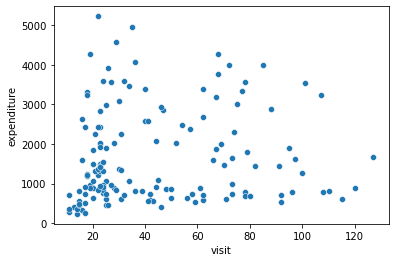

In [53]:
sns.scatterplot(
               x=demographics
    .loc[(demographics.breakdown_of_domestic_tourism == 'Visits') & (demographics.demo != 'All'), 'value']
    .reset_index(name='visit')
    .visit,
               y=demographics
    .loc[(demographics.breakdown_of_domestic_tourism == 'Expenditure') & (demographics.demo != 'All'), 'value']
    .reset_index(name='expenditure')
    .expenditure
)

In [54]:
(
    demographics
    .loc[(demographics.demo != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('demo')
    .value
    .mean()
    .reset_index(name='mean_expenditure')
)

demo  mean_expenditure
0                                  16-24 years        745.285714
1                                  25-34 years       1085.428571
2                                  35-44 years        876.714286
3                                  45-54 years        848.428571
4                                  55-64 years        827.428571
5                            65 years and over        724.285714
6                                           AB       1837.714286
7                           Access to car (1+)       4374.714286
8                                           C1       1494.142857
9                                           C2        995.714286
10                                          DE        779.857143
11  Employed/self-employed (full or part time)       3292.142857
12                                      Female       2566.000000
13              In full or part time education        379.857143
14                                        Male       2541.285714
15                                     Married       3418.285714
16                               No - Children       3349.000000
17                        No access to car (0)        732.571429
18                                 Not Married       1689.000000
19                      Unemployed/not working        609.571429
20                              Yes - Children       1758.285714

<AxesSubplot:xlabel='total_expenditure', ylabel='demo'>

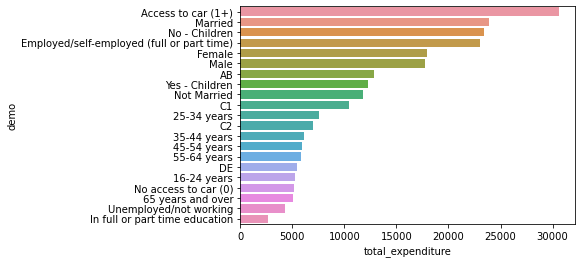

In [55]:
sns.barplot(data=(
    demographics
    .loc[(demographics.demo != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('demo')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='total_expenditure',
            y='demo')

<AxesSubplot:xlabel='mean_expenditure', ylabel='demo'>

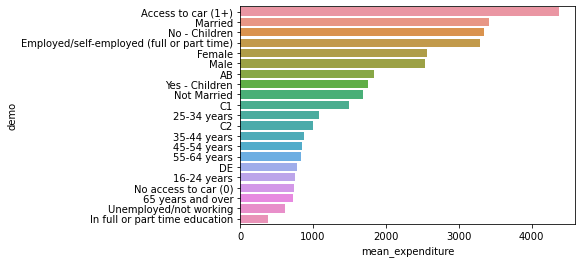

In [56]:
sns.barplot(data=(
    demographics
    .loc[(demographics.demo != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('demo')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='mean_expenditure')
),
            x='mean_expenditure',
            y='demo')

<AxesSubplot:xlabel='mean_visits', ylabel='demo'>

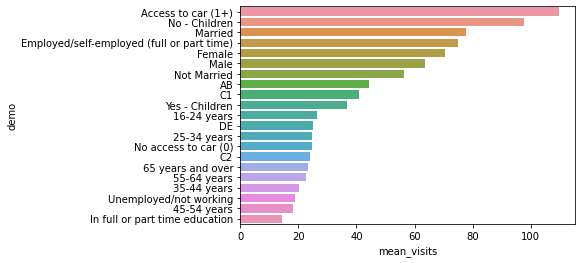

In [57]:
sns.barplot(data=(
    demographics
    .loc[(demographics.demo != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('demo')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='mean_visits')
),
            x='mean_visits',
            y='demo')

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

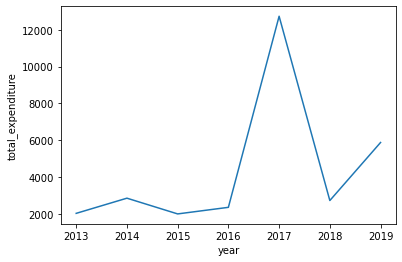

In [58]:
sns.lineplot(data=(
    demographics
    .loc[(demographics.demo != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
             x='year',
             y='total_expenditure')

<AxesSubplot:xlabel='year', ylabel='total_visits'>

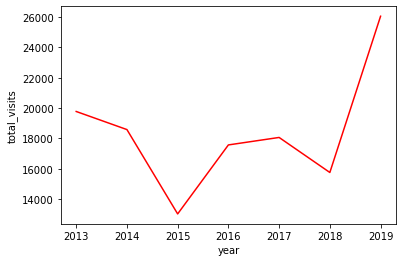

In [59]:
sns.lineplot(data=(
    demographics
    .loc[(demographics.demo != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
             x='year',
             y='total_visits',
            color='red')

# AGE DEMOGRAPHIC

## Find which age group has spent the most (sum)

In [60]:
(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('age')
    .value
    .sum()
    .sort_values(ascending=False)
)

age
25-34 years          7598
35-44 years          6137
45-54 years          5939
55-64 years          5792
16-24 years          5217
65 years and over    5070
Name: value, dtype: int64

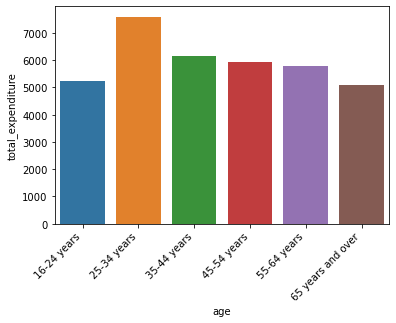

In [61]:
sns.barplot(data=(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('age')
    .value
    .sum()
    .reset_index(name='total_expenditure')
),
            x='age',
            y='total_expenditure')

plt.xticks(rotation=45, ha='right')

plt.show()

## Find which age group has spent the most (mean)

In [62]:
(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('age')
    .value
    .mean()
    .sort_values(ascending=False)
)

age
25-34 years          1085.428571
35-44 years           876.714286
45-54 years           848.428571
55-64 years           827.428571
16-24 years           745.285714
65 years and over     724.285714
Name: value, dtype: float64

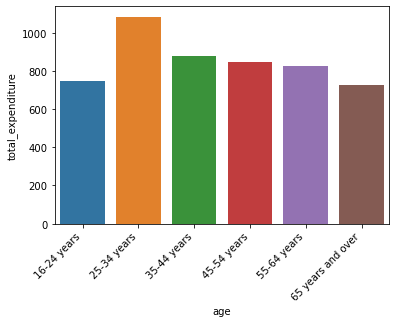

In [63]:
sns.barplot(data=(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('age')
    .value
    .mean()
    .reset_index(name='total_expenditure')
),
            x='age',
            y='total_expenditure')

plt.xticks(rotation=45, ha='right')

plt.show()

## Plot total expenditure per year per age group

In [64]:
age_expenditure = (
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['age', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure_per_year')
)

age_expenditure

age  year  total_expenditure_per_year
0         16-24 years  2013                         541
1         16-24 years  2014                         966
2         16-24 years  2015                         565
3         16-24 years  2016                         563
4         16-24 years  2017                         958
5         16-24 years  2018                         935
6         16-24 years  2019                         689
7         25-34 years  2013                         994
8         25-34 years  2014                         831
9         25-34 years  2015                         825
10        25-34 years  2016                         920
11        25-34 years  2017                        1268
12        25-34 years  2018                        1454
13        25-34 years  2019                        1306
14        35-44 years  2013                         729
15        35-44 years  2014                         733
16        35-44 years  2015                         709
17        35-44 years  2016                         911
18        35-44 years  2017                        1361
19        35-44 years  2018                         637
20        35-44 years  2019                        1057
21        45-54 years  2013                         969
22        45-54 years  2014                         809
23        45-54 years  2015                         607
24        45-54 years  2016                        1076
25        45-54 years  2017                         808
26        45-54 years  2018                         896
27        45-54 years  2019                         774
28        55-64 years  2013                         615
29        55-64 years  2014                         794
30        55-64 years  2015                         748
31        55-64 years  2016                         808
32        55-64 years  2017                         898
33        55-64 years  2018                         850
34        55-64 years  2019                        1079
35  65 years and over  2013                         799
36  65 years and over  2014                         888
37  65 years and over  2015                         468
38  65 years and over  2016                         638
39  65 years and over  2017                         702
40  65 years and over  2018                         702
41  65 years and over  2019                         873

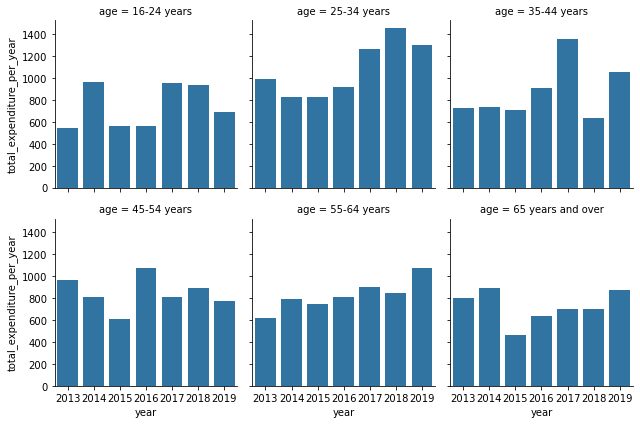

In [65]:
grid_age_expenditure = sns.FacetGrid(age_expenditure, col='age', col_wrap=3)
grid_age_expenditure.map_dataframe(sns.barplot, x='year', y='total_expenditure_per_year')

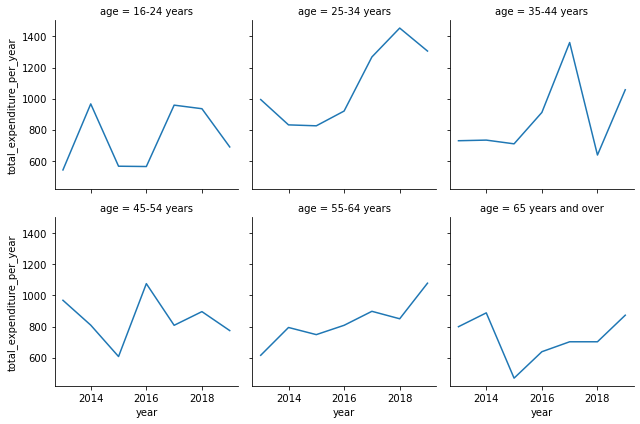

In [66]:
grid_age_expenditure_line = sns.FacetGrid(age_expenditure, col='age', col_wrap=3)
grid_age_expenditure_line.map_dataframe(sns.lineplot, x='year', y='total_expenditure_per_year')

<AxesSubplot:xlabel='year', ylabel='total_expenditure_per_year'>

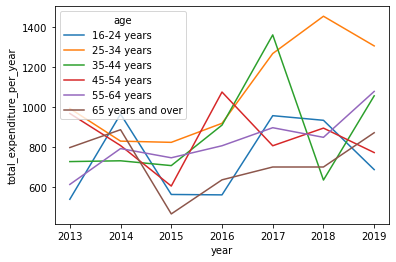

In [67]:
sns.lineplot(data=age_expenditure,
            x='year',
            y='total_expenditure_per_year',
            hue='age')

In [68]:
(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('age')
    .value
    .sum()
    .sort_values(ascending=False)
)

age
16-24 years          184
25-34 years          173
65 years and over    164
55-64 years          158
35-44 years          141
45-54 years          126
Name: value, dtype: int64

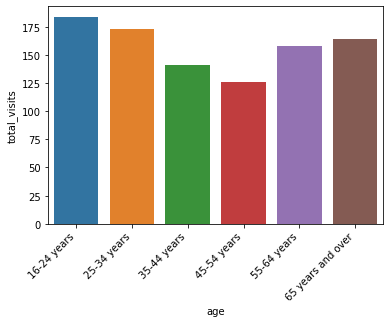

In [69]:
sns.barplot(data=(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('age')
    .value
    .sum()
    .reset_index(name='total_visits')
),
            x='age',
            y='total_visits')

plt.xticks(rotation=45, ha='right')

plt.show()

In [70]:
age_visits = (
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['age', 'year'])
    .value
    .sum()
    .reset_index(name='total_visits_per_year')
)

age_visits

age  year  total_visits_per_year
0         16-24 years  2013                     22
1         16-24 years  2014                     24
2         16-24 years  2015                     27
3         16-24 years  2016                     24
4         16-24 years  2017                     34
5         16-24 years  2018                     28
6         16-24 years  2019                     25
7         25-34 years  2013                     21
8         25-34 years  2014                     18
9         25-34 years  2015                     25
10        25-34 years  2016                     23
11        25-34 years  2017                     31
12        25-34 years  2018                     30
13        25-34 years  2019                     25
14        35-44 years  2013                     18
15        35-44 years  2014                     21
16        35-44 years  2015                     19
17        35-44 years  2016                     25
18        35-44 years  2017                     20
19        35-44 years  2018                     18
20        35-44 years  2019                     20
21        45-54 years  2013                     22
22        45-54 years  2014                     18
23        45-54 years  2015                     15
24        45-54 years  2016                     17
25        45-54 years  2017                     20
26        45-54 years  2018                     17
27        45-54 years  2019                     17
28        55-64 years  2013                     19
29        55-64 years  2014                     23
30        55-64 years  2015                     20
31        55-64 years  2016                     26
32        55-64 years  2017                     24
33        55-64 years  2018                     23
34        55-64 years  2019                     23
35  65 years and over  2013                     23
36  65 years and over  2014                     23
37  65 years and over  2015                     20
38  65 years and over  2016                     28
39  65 years and over  2017                     23
40  65 years and over  2018                     23
41  65 years and over  2019                     24

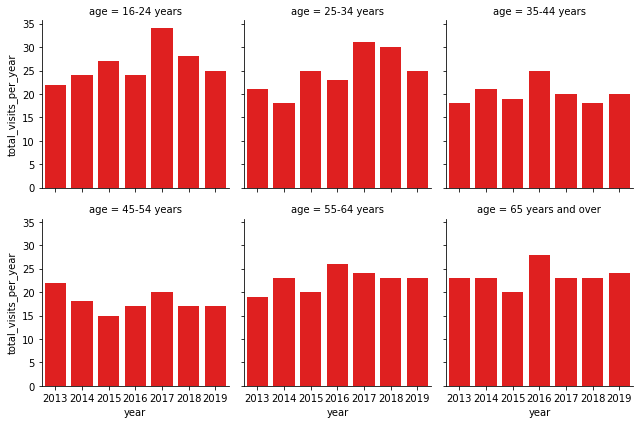

In [71]:
grid_age_visits = sns.FacetGrid(age_visits, col='age', col_wrap=3)
grid_age_visits.map_dataframe(sns.barplot, x='year', y='total_visits_per_year', color='red')

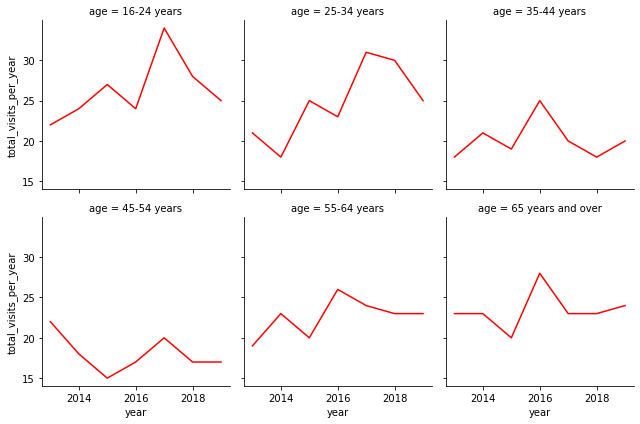

In [72]:
grid_age_visits_line = sns.FacetGrid(age_visits, col='age', col_wrap=3)
grid_age_visits_line.map_dataframe(sns.lineplot, x='year', y='total_visits_per_year', color='red')

<AxesSubplot:xlabel='year', ylabel='total_visits_per_year'>

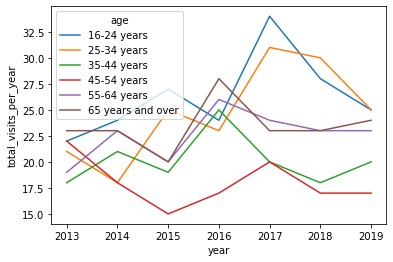

In [73]:
sns.lineplot(data=age_visits,
            x='year',
            y='total_visits_per_year',
            hue='age')

# MARITAL STATUS DEMOGRAPHIC

In [74]:
(
    demographics
    .loc[(demographics.marital_status != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('marital_status')
    .value
    .sum()
    .sort_values(ascending=False)
)

marital_status
Married        23928
Not Married    11823
Name: value, dtype: int64

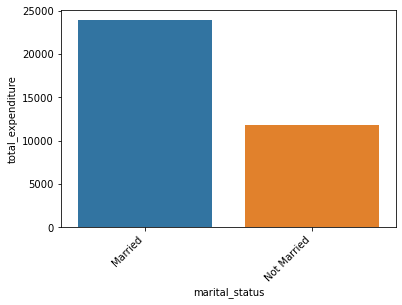

In [75]:
sns.barplot(data=(
    demographics
    .loc[(demographics.marital_status != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('marital_status')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='marital_status',
            y='total_expenditure')

plt.xticks(rotation=45, ha='right')

plt.show()

In [76]:
marital_expenditure = (
    demographics
    .loc[(demographics.marital_status != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['marital_status', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure_per_year')
)

marital_expenditure

marital_status  year  total_expenditure_per_year
0         Married  2013                        3328
1         Married  2014                        3388
2         Married  2015                        2672
3         Married  2016                        3461
4         Married  2017                        3566
5         Married  2018                        3589
6         Married  2019                        3924
7     Not Married  2013                        1319
8     Not Married  2014                        1633
9     Not Married  2015                        1249
10    Not Married  2016                        1455
11    Not Married  2017                        2429
12    Not Married  2018                        1885
13    Not Married  2019                        1853

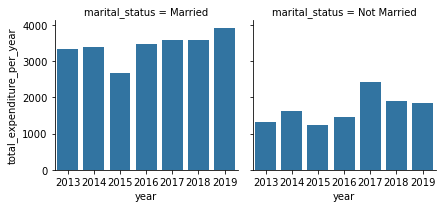

In [77]:
grid_marital_expenditure = sns.FacetGrid(marital_expenditure, col='marital_status', col_wrap=3)
grid_marital_expenditure.map_dataframe(sns.barplot, x='year', y='total_expenditure_per_year')

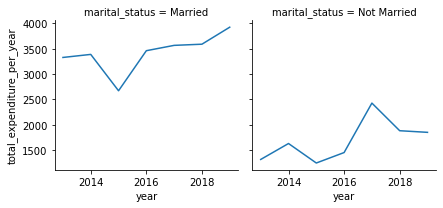

In [78]:
grid_marital_expenditure = sns.FacetGrid(marital_expenditure, col='marital_status', col_wrap=3)
grid_marital_expenditure.map_dataframe(sns.lineplot, x='year', y='total_expenditure_per_year')

In [79]:
(
    demographics
    .loc[(demographics.marital_status != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('marital_status')
    .value
    .sum()
    .sort_values(ascending=False)
)

marital_status
Married        545
Not Married    395
Name: value, dtype: int64

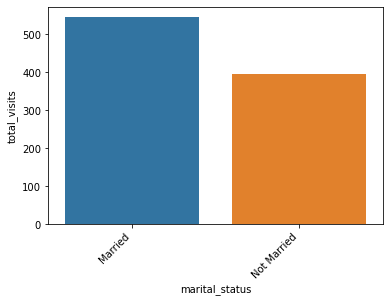

In [80]:
sns.barplot(data=(
    demographics
    .loc[(demographics.marital_status != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('marital_status')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='marital_status',
            y='total_visits')

plt.xticks(rotation=45, ha='right')

plt.show()

In [81]:
marital_visits = (
    demographics
    .loc[(demographics.marital_status != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['marital_status', 'year'])
    .value
    .sum()
    .reset_index(name='total_visits_per_year')
)

marital_visits

marital_status  year  total_visits_per_year
0         Married  2013                     75
1         Married  2014                     73
2         Married  2015                     73
3         Married  2016                     85
4         Married  2017                     82
5         Married  2018                     79
6         Married  2019                     78
7     Not Married  2013                     48
8     Not Married  2014                     54
9     Not Married  2015                     52
10    Not Married  2016                     57
11    Not Married  2017                     69
12    Not Married  2018                     59
13    Not Married  2019                     56

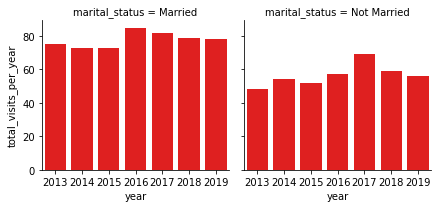

In [82]:
grid_marital_visits = sns.FacetGrid(marital_visits, col='marital_status', col_wrap=3)
grid_marital_visits.map_dataframe(sns.barplot, x='year', y='total_visits_per_year', color='red')

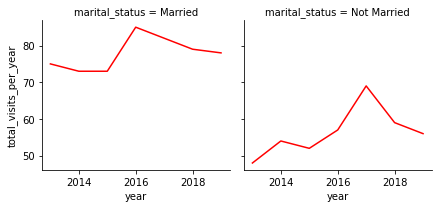

In [83]:
grid_marital_visits = sns.FacetGrid(marital_visits, col='marital_status', col_wrap=3)
grid_marital_visits.map_dataframe(sns.lineplot, x='year', y='total_visits_per_year', color='red')

# ACCESS TO A CAR DEMOGRAPHIC

In [84]:
(
    demographics
    .loc[(demographics.access_to_car != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('access_to_car')
    .value
    .sum()
    .sort_values(ascending=False)
)

access_to_car
Access to car (1+)      30623
No access to car (0)     5128
Name: value, dtype: int64

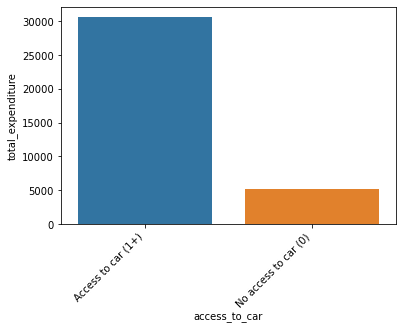

In [85]:
sns.barplot(data=(
    demographics
    .loc[(demographics.access_to_car != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('access_to_car')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='access_to_car',
            y='total_expenditure')

plt.xticks(rotation=45, ha='right')

plt.show()

In [86]:
access_car_expenditure = (
    demographics
    .loc[(demographics.access_to_car != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['access_to_car', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure_per_year')
)

access_car_expenditure

access_to_car  year  total_expenditure_per_year
0     Access to car (1+)  2013                        4069
1     Access to car (1+)  2014                        4279
2     Access to car (1+)  2015                        3240
3     Access to car (1+)  2016                        4276
4     Access to car (1+)  2017                        5232
5     Access to car (1+)  2018                        4575
6     Access to car (1+)  2019                        4952
7   No access to car (0)  2013                         578
8   No access to car (0)  2014                         741
9   No access to car (0)  2015                         682
10  No access to car (0)  2016                         640
11  No access to car (0)  2017                         763
12  No access to car (0)  2018                         899
13  No access to car (0)  2019                         825

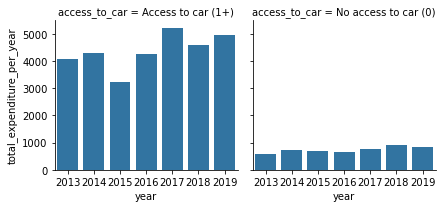

In [87]:
grid_access_car_expenditure = sns.FacetGrid(access_car_expenditure, col='access_to_car', col_wrap=3)
grid_access_car_expenditure.map_dataframe(sns.barplot, x='year', y='total_expenditure_per_year')

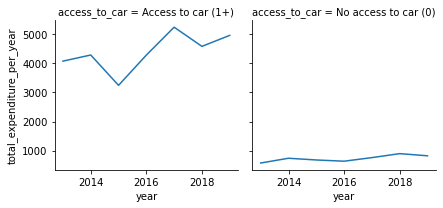

In [88]:
grid_access_car_expenditure = sns.FacetGrid(access_car_expenditure, col='access_to_car', col_wrap=3)
grid_access_car_expenditure.map_dataframe(sns.lineplot, x='year', y='total_expenditure_per_year')

In [89]:
(
    demographics
    .loc[(demographics.access_to_car != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('access_to_car')
    .value
    .sum()
    .sort_values(ascending=False)
)

access_to_car
Access to car (1+)      768
No access to car (0)    172
Name: value, dtype: int64

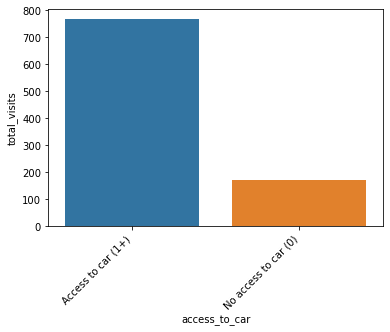

In [90]:
sns.barplot(data=(
    demographics
    .loc[(demographics.access_to_car != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('access_to_car')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='access_to_car',
            y='total_visits')

plt.xticks(rotation=45, ha='right')

plt.show()

In [91]:
access_car_visits = (
    demographics
    .loc[(demographics.access_to_car != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['access_to_car', 'year'])
    .value
    .sum()
    .reset_index(name='total_visits_per_year')
)

access_car_visits

access_to_car  year  total_visits_per_year
0     Access to car (1+)  2013                    100
1     Access to car (1+)  2014                    101
2     Access to car (1+)  2015                     95
3     Access to car (1+)  2016                    120
4     Access to car (1+)  2017                    127
5     Access to car (1+)  2018                    115
6     Access to car (1+)  2019                    110
7   No access to car (0)  2013                     24
8   No access to car (0)  2014                     26
9   No access to car (0)  2015                     30
10  No access to car (0)  2016                     22
11  No access to car (0)  2017                     24
12  No access to car (0)  2018                     23
13  No access to car (0)  2019                     23

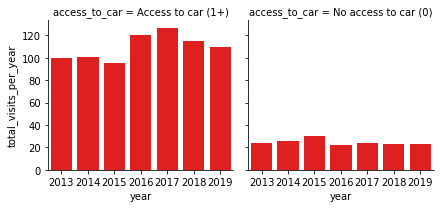

In [92]:
grid_access_car_visits = sns.FacetGrid(access_car_visits, col='access_to_car', col_wrap=3)
grid_access_car_visits.map_dataframe(sns.barplot, x='year', y='total_visits_per_year', color='red')

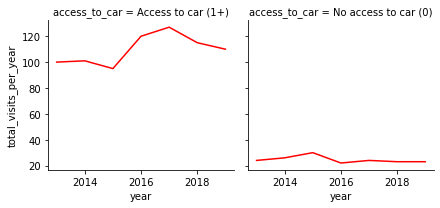

In [93]:
grid_access_car_visits = sns.FacetGrid(access_car_visits, col='access_to_car', col_wrap=3)
grid_access_car_visits.map_dataframe(sns.lineplot, x='year', y='total_visits_per_year', color='red')

# CHILDREN DEMOGRAPHIC

In [94]:
(
    demographics
    .loc[(demographics.children != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('children')
    .value
    .sum()
    .sort_values(ascending=False)
)

children
No - Children     23443
Yes - Children    12308
Name: value, dtype: int64

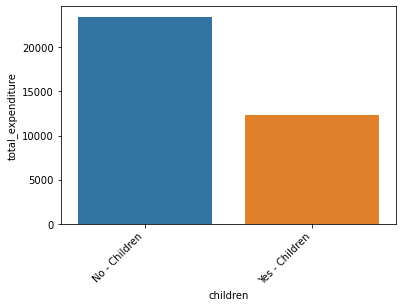

In [95]:
sns.barplot(data=(
    demographics
    .loc[(demographics.children != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('children')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='children',
            y='total_expenditure')

plt.xticks(rotation=45, ha='right')

plt.show()

In [96]:
children_expenditure = (
    demographics
    .loc[(demographics.children != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['children', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure_per_year')
)

children_expenditure

children  year  total_expenditure_per_year
0    No - Children  2013                        3092
1    No - Children  2014                        3604
2    No - Children  2015                        2579
3    No - Children  2016                        3240
4    No - Children  2017                        3992
5    No - Children  2018                        3401
6    No - Children  2019                        3535
7   Yes - Children  2013                        1555
8   Yes - Children  2014                        1416
9   Yes - Children  2015                        1342
10  Yes - Children  2016                        1677
11  Yes - Children  2017                        2003
12  Yes - Children  2018                        2073
13  Yes - Children  2019                        2242

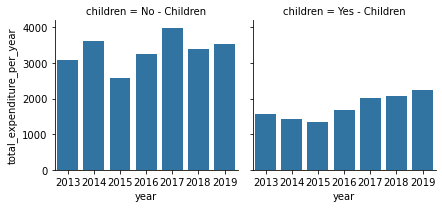

In [97]:
grid_children_expenditure = sns.FacetGrid(children_expenditure, col='children', col_wrap=3)
grid_children_expenditure.map_dataframe(sns.barplot, x='year', y='total_expenditure_per_year')

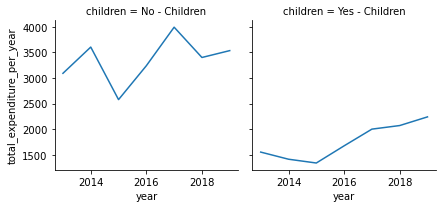

In [98]:
grid_children_expenditure = sns.FacetGrid(children_expenditure, col='children', col_wrap=3)
grid_children_expenditure.map_dataframe(sns.lineplot, x='year', y='total_expenditure_per_year')

In [99]:
(
    demographics
    .loc[(demographics.children != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('children')
    .value
    .sum()
    .sort_values(ascending=False)
)

children
No - Children     683
Yes - Children    257
Name: value, dtype: int64

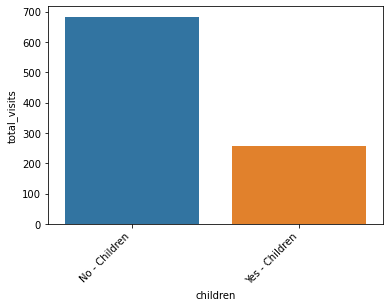

In [100]:
sns.barplot(data=(
    demographics
    .loc[(demographics.children != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('children')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='children',
            y='total_visits')

plt.xticks(rotation=45, ha='right')

plt.show()

In [101]:
children_visits = (
    demographics
    .loc[(demographics.children != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['children', 'year'])
    .value
    .sum()
    .reset_index(name='total_visits_per_year')
)

children_visits

children  year  total_visits_per_year
0    No - Children  2013                     92
1    No - Children  2014                     96
2    No - Children  2015                     92
3    No - Children  2016                    108
4    No - Children  2017                    107
5    No - Children  2018                     97
6    No - Children  2019                     91
7   Yes - Children  2013                     32
8   Yes - Children  2014                     31
9   Yes - Children  2015                     32
10  Yes - Children  2016                     34
11  Yes - Children  2017                     44
12  Yes - Children  2018                     41
13  Yes - Children  2019                     43

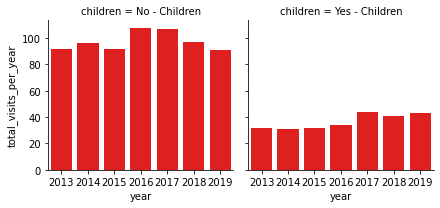

In [102]:
grid_children_visits = sns.FacetGrid(children_visits, col='children', col_wrap=3)
grid_children_visits.map_dataframe(sns.barplot, x='year', y='total_visits_per_year', color='red')

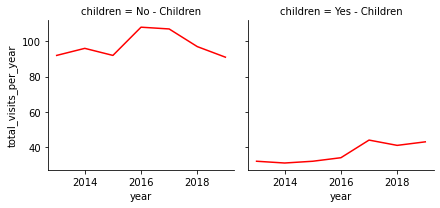

In [103]:
grid_children_visits = sns.FacetGrid(children_visits, col='children', col_wrap=3)
grid_children_visits.map_dataframe(sns.lineplot, x='year', y='total_visits_per_year', color='red')

# EMPLOYMENT DEMOGRAPHIC

In [104]:
(
    demographics
    .loc[(demographics.employment_status != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('employment_status')
    .value
    .sum()
    .sort_values(ascending=False)
)

employment_status
Employed/self-employed (full or part time)    23045
Unemployed/not working                         4267
In full or part time education                 2659
Name: value, dtype: int64

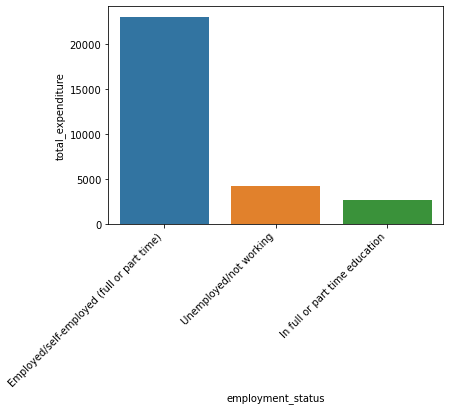

In [105]:
sns.barplot(data=(
    demographics
    .loc[(demographics.employment_status != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('employment_status')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='employment_status',
            y='total_expenditure')

plt.xticks(rotation=45, ha='right')

plt.show()

In [106]:
employment_expenditure = (
    demographics
    .loc[(demographics.employment_status != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['employment_status', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure_per_year')
)

employment_expenditure

employment_status  year  \
0   Employed/self-employed (full or part time)  2013   
1   Employed/self-employed (full or part time)  2014   
2   Employed/self-employed (full or part time)  2015   
3   Employed/self-employed (full or part time)  2016   
4   Employed/self-employed (full or part time)  2017   
5   Employed/self-employed (full or part time)  2018   
6   Employed/self-employed (full or part time)  2019   
7               In full or part time education  2013   
8               In full or part time education  2014   
9               In full or part time education  2015   
10              In full or part time education  2016   
11              In full or part time education  2017   
12              In full or part time education  2018   
13              In full or part time education  2019   
14                      Unemployed/not working  2013   
15                      Unemployed/not working  2014   
16                      Unemployed/not working  2015   
17                      Unemployed/not working  2016   
18                      Unemployed/not working  2017   
19                      Unemployed/not working  2018   
20                      Unemployed/not working  2019   

    total_expenditure_per_year  
0                         2894  
1                         3177  
2                         2294  
3                         3334  
4                         4011  
5                         3771  
6                         3564  
7                          283  
8                          232  
9                          349  
10                         322  
11                         571  
12                         402  
13                         500  
14                        1600  
15                         368  
16                         483  
17                         255  
18                         450  
19                         396  
20                         715

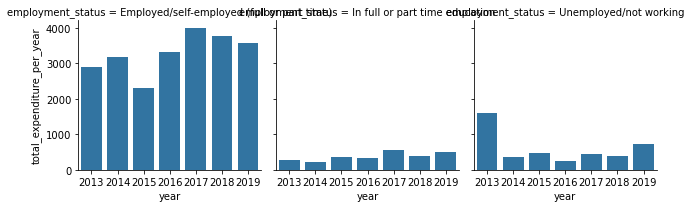

In [107]:
grid_employment_expenditure = sns.FacetGrid(employment_expenditure, col='employment_status', col_wrap=3)
grid_employment_expenditure.map_dataframe(sns.barplot, x='year', y='total_expenditure_per_year')

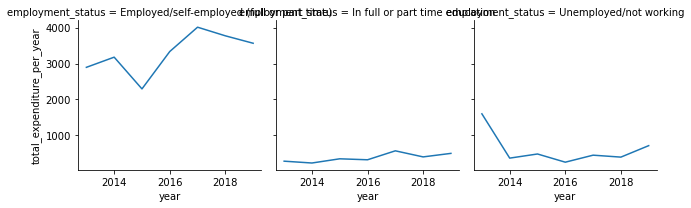

In [108]:
grid_employment_expenditure = sns.FacetGrid(employment_expenditure, col='employment_status', col_wrap=3)
grid_employment_expenditure.map_dataframe(sns.lineplot, x='year', y='total_expenditure_per_year')

In [109]:
(
    demographics
    .loc[(demographics.employment_status != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('employment_status')
    .value
    .sum()
    .sort_values(ascending=False)
)

employment_status
Employed/self-employed (full or part time)    524
Unemployed/not working                        131
In full or part time education                100
Name: value, dtype: int64

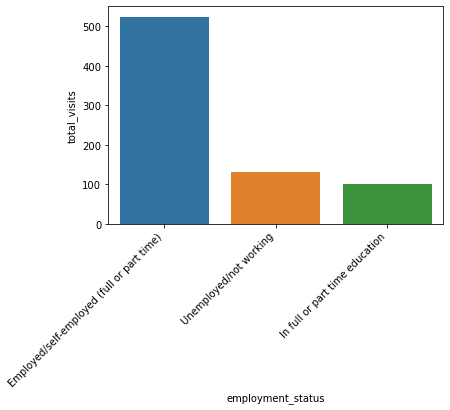

In [110]:
sns.barplot(data=(
    demographics
    .loc[(demographics.employment_status != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('employment_status')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='employment_status',
            y='total_visits')

plt.xticks(rotation=45, ha='right')

plt.show()

In [111]:
employment_visits = (
    demographics
    .loc[(demographics.employment_status != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['employment_status', 'year'])
    .value
    .sum()
    .reset_index(name='total_visits_per_year')
)

employment_visits

employment_status  year  total_visits_per_year
0   Employed/self-employed (full or part time)  2013                     68
1   Employed/self-employed (full or part time)  2014                     72
2   Employed/self-employed (full or part time)  2015                     67
3   Employed/self-employed (full or part time)  2016                     78
4   Employed/self-employed (full or part time)  2017                     88
5   Employed/self-employed (full or part time)  2018                     77
6   Employed/self-employed (full or part time)  2019                     74
7               In full or part time education  2013                     13
8               In full or part time education  2014                     11
9               In full or part time education  2015                     14
10              In full or part time education  2016                     17
11              In full or part time education  2017                     16
12              In full or part time education  2018                     15
13              In full or part time education  2019                     14
14                      Unemployed/not working  2013                     46
15                      Unemployed/not working  2014                     11
16                      Unemployed/not working  2015                     15
17                      Unemployed/not working  2016                     11
18                      Unemployed/not working  2017                     16
19                      Unemployed/not working  2018                     15
20                      Unemployed/not working  2019                     17

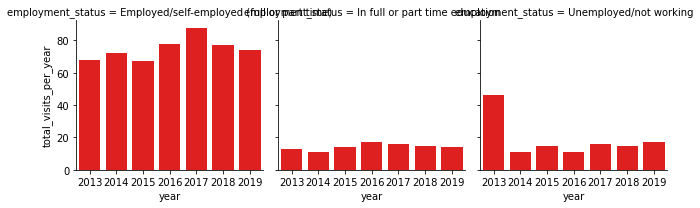

In [112]:
grid_employment_visits = sns.FacetGrid(employment_visits, col='employment_status', col_wrap=3)
grid_employment_visits.map_dataframe(sns.barplot, x='year', y='total_visits_per_year', color='red')

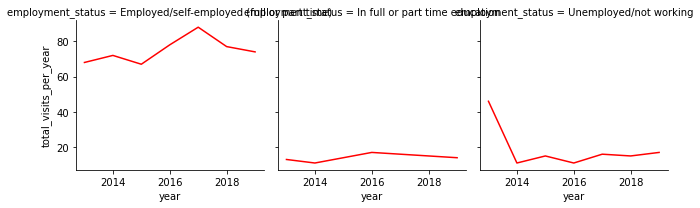

In [113]:
grid_employment_visits = sns.FacetGrid(employment_visits, col='employment_status', col_wrap=3)
grid_employment_visits.map_dataframe(sns.lineplot, x='year', y='total_visits_per_year', color='red')

# Question 3

#### What type of locations receive the most visits?
#### What kinds of locations do people spend the most in?

### Total visits by type of location


In [114]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.type_of_location_visited != 'All areas'), :]
    .groupby('type_of_location_visited')
    .value
    .sum()
    .sort_values(ascending=False)
)

type_of_location_visited
City/large town           431
Small town                254
Rural countryside         133
Village                   106
Seaside resort or town     57
Seaside - beach            37
Seaside - other            14
Name: value, dtype: int64

# Total visits by location type

In [115]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

location_type
City               431
Town or Village    360
Countryside        133
Seaside            108
Name: value, dtype: int64

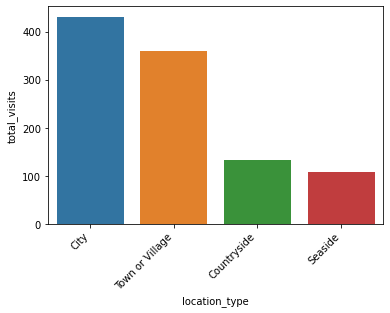

In [116]:
sns.barplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='location_type',
            y='total_visits')

plt.xticks(rotation=45, ha='right')

plt.show()

In [117]:
location_visits_total = (
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.location_type != 'All'), :]
    .groupby(['location_type', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits_per_year')
)

location_visits_total

location_type  year  total_visits_per_year
0              City  2017                     70
1              City  2018                     64
2              City  2016                     61
3              City  2013                     59
4              City  2014                     59
5              City  2015                     59
6              City  2019                     59
7   Town or Village  2017                     59
8   Town or Village  2016                     56
9   Town or Village  2018                     54
10  Town or Village  2019                     53
11  Town or Village  2013                     48
12  Town or Village  2014                     47
13  Town or Village  2015                     43
14      Countryside  2016                     22
15      Countryside  2017                     21
16      Countryside  2019                     19
17      Countryside  2014                     19
18          Seaside  2017                     19
19      Countryside  2013                     18
20      Countryside  2015                     17
21      Countryside  2018                     17
22          Seaside  2019                     17
23          Seaside  2018                     15
24          Seaside  2013                     15
25          Seaside  2016                     14
26          Seaside  2015                     14
27          Seaside  2014                     14

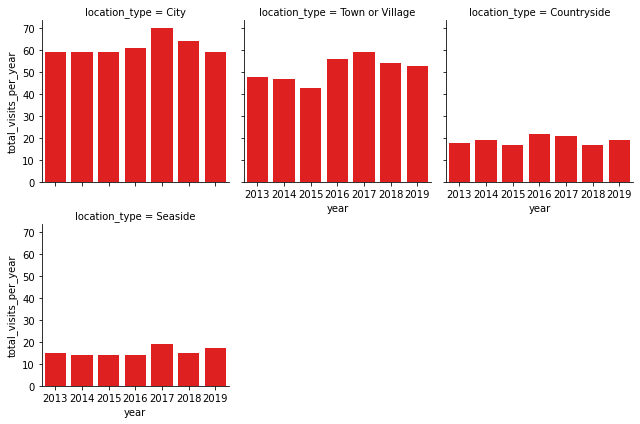

In [118]:
grid_location_visits_total = sns.FacetGrid(location_visits_total, col='location_type', col_wrap=3)
grid_location_visits_total.map_dataframe(sns.barplot, x='year', y='total_visits_per_year', color='red')

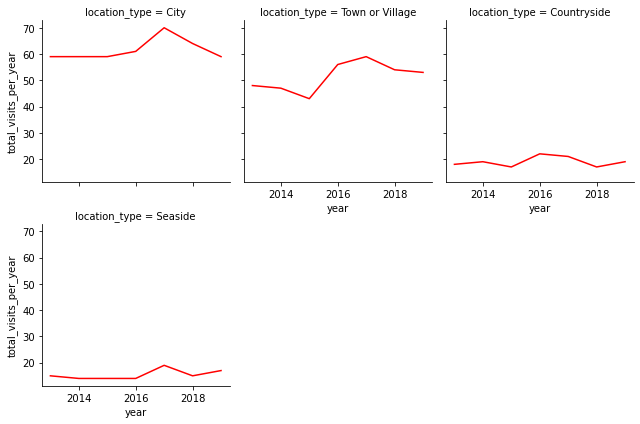

In [119]:
grid_location_visits_total = sns.FacetGrid(location_visits_total, col='location_type', col_wrap=3)
grid_location_visits_total.map_dataframe(sns.lineplot, x='year', y='total_visits_per_year', color='red')

<AxesSubplot:xlabel='year', ylabel='total_visits_per_year'>

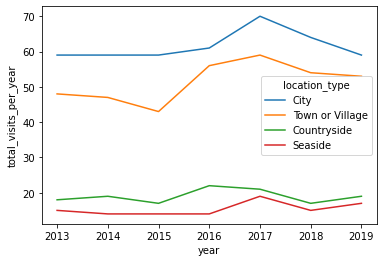

In [120]:
sns.lineplot(data=location_visits_total,
            x='year',
            y='total_visits_per_year',
            hue='location_type')

<AxesSubplot:xlabel='year', ylabel='total_visits'>

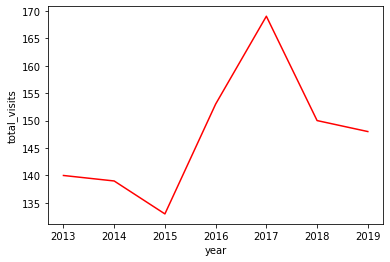

In [121]:
sns.lineplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.location_type != 'All'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
             x='year',
             y='total_visits',
            color='red')

# Average visits by location type

In [122]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .mean()
    .sort_values(ascending=False)
)

location_type
City               61.571429
Town or Village    25.714286
Countryside        19.000000
Seaside             5.142857
Name: value, dtype: float64

### Average visits by location type per year with plot

In [123]:
location_visits = (
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.location_type != 'All'), :]
    .groupby(['location_type', 'year'])
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='mean_visits_per_year')
)

location_visits

location_type  year  mean_visits_per_year
0              City  2017             70.000000
1              City  2018             64.000000
2              City  2016             61.000000
3              City  2013             59.000000
4              City  2014             59.000000
5              City  2015             59.000000
6              City  2019             59.000000
7   Town or Village  2017             29.500000
8   Town or Village  2016             28.000000
9   Town or Village  2018             27.000000
10  Town or Village  2019             26.500000
11  Town or Village  2013             24.000000
12  Town or Village  2014             23.500000
13      Countryside  2016             22.000000
14  Town or Village  2015             21.500000
15      Countryside  2017             21.000000
16      Countryside  2019             19.000000
17      Countryside  2014             19.000000
18      Countryside  2013             18.000000
19      Countryside  2015             17.000000
20      Countryside  2018             17.000000
21          Seaside  2017              6.333333
22          Seaside  2019              5.666667
23          Seaside  2018              5.000000
24          Seaside  2013              5.000000
25          Seaside  2016              4.666667
26          Seaside  2015              4.666667
27          Seaside  2014              4.666667

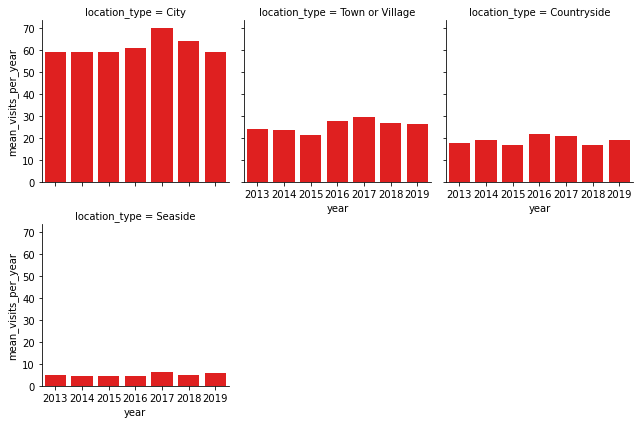

In [124]:
grid_location_visits = sns.FacetGrid(location_visits, col='location_type', col_wrap=3)
grid_location_visits.map_dataframe(sns.barplot, x='year', y='mean_visits_per_year', color='red')

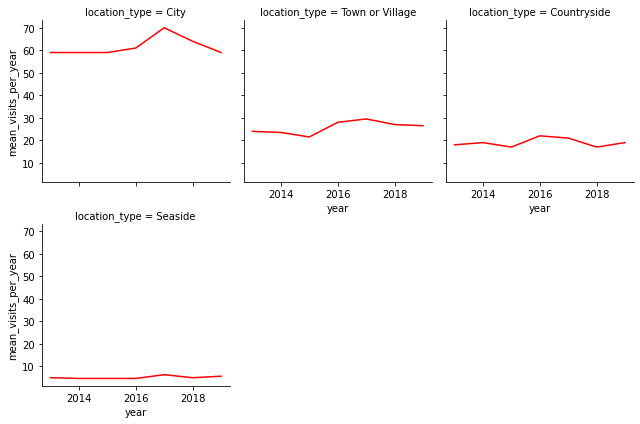

In [125]:
grid_location_visits = sns.FacetGrid(location_visits, col='location_type', col_wrap=3)
grid_location_visits.map_dataframe(sns.lineplot, x='year', y='mean_visits_per_year', color='red')

<AxesSubplot:xlabel='year', ylabel='mean_visits_per_year'>

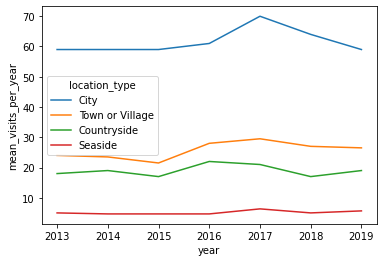

In [126]:
sns.lineplot(data=location_visits,
            x='year',
            y='mean_visits_per_year',
            hue='location_type')

### Total expenditure by type of location

In [127]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.type_of_location_visited != 'All areas'), :]
    .groupby('type_of_location_visited')
    .value
    .sum()
    .sort_values(ascending=False)
)

type_of_location_visited
City/large town           20497
Small town                 8451
Rural countryside          3788
Village                    3774
Seaside resort or town     2069
Seaside - beach            1367
Seaside - other             380
Name: value, dtype: int64

### Average expenditure by type of location

In [128]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.type_of_location_visited != 'All areas'), :]
    .groupby('type_of_location_visited')
    .value
    .mean()
    .sort_values(ascending=False)
)

type_of_location_visited
City/large town           2928.142857
Small town                1207.285714
Rural countryside          541.142857
Village                    539.142857
Seaside resort or town     295.571429
Seaside - beach            195.285714
Seaside - other             54.285714
Name: value, dtype: float64

# Total expenditure by location type

In [129]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

location_type
City               20497
Town or Village    12225
Seaside             3816
Countryside         3788
Name: value, dtype: int64

<AxesSubplot:xlabel='location_type', ylabel='total_expenditure'>

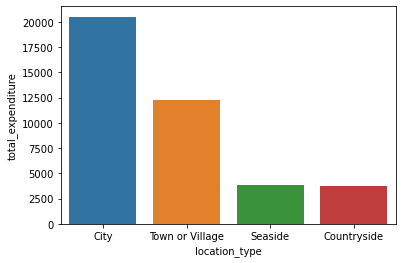

In [130]:
sns.barplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='location_type',
            y='total_expenditure')

In [131]:
location_expenditure_total = (
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby(['location_type', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_year')
)

location_expenditure_total

location_type  year  total_expenditure_per_year
0              City  2019                        3400
1              City  2017                        3379
2              City  2018                        3111
3              City  2014                        2873
4              City  2013                        2850
5              City  2016                        2630
6   Town or Village  2017                        2260
7              City  2015                        2254
8   Town or Village  2019                        1913
9   Town or Village  2014                        1908
10  Town or Village  2018                        1885
11  Town or Village  2016                        1519
12  Town or Village  2013                        1518
13  Town or Village  2015                        1222
14          Seaside  2017                         779
15      Countryside  2017                         778
16          Seaside  2019                         631
17      Countryside  2014                         612
18          Seaside  2014                         600
19          Seaside  2016                         583
20      Countryside  2013                         545
21      Countryside  2016                         520
22      Countryside  2018                         502
23          Seaside  2013                         491
24      Countryside  2019                         429
25      Countryside  2015                         402
26          Seaside  2018                         385
27          Seaside  2015                         347

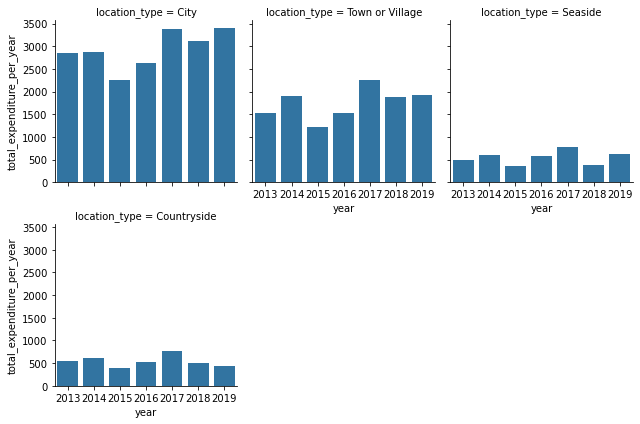

In [132]:
grid_location_expenditure_total = sns.FacetGrid(location_expenditure_total, col='location_type', col_wrap=3)
grid_location_expenditure_total.map_dataframe(sns.barplot, x='year', y='total_expenditure_per_year')

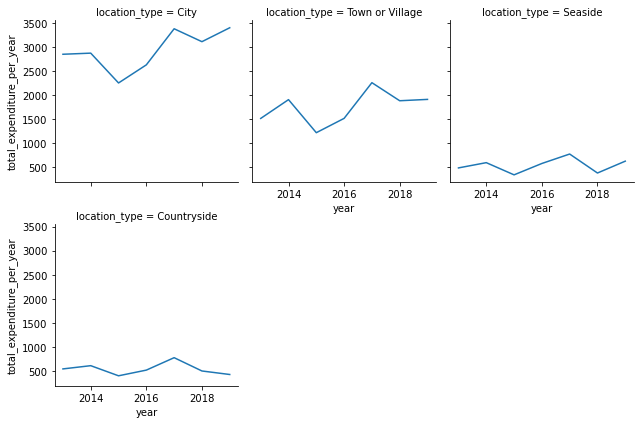

In [133]:
grid_location_expenditure_total = sns.FacetGrid(location_expenditure_total, col='location_type', col_wrap=3)
grid_location_expenditure_total.map_dataframe(sns.lineplot, x='year', y='total_expenditure_per_year')

<AxesSubplot:xlabel='year', ylabel='total_expenditure_per_year'>

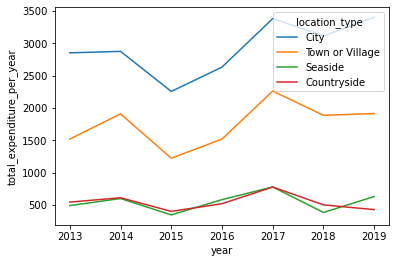

In [134]:
sns.lineplot(data=location_expenditure_total,
            x='year',
            y='total_expenditure_per_year',
            hue='location_type')

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

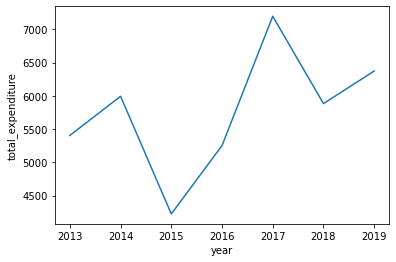

In [135]:
sns.lineplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby('year')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
             x='year',
             y='total_expenditure')

# Average expenditure by location type

In [136]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .mean()
    .sort_values(ascending=False)
)

location_type
City               2928.142857
Town or Village     873.214286
Countryside         541.142857
Seaside             181.714286
Name: value, dtype: float64

### Average expenditure by location type per year

In [137]:
location_expenditure = (
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby(['location_type', 'year'])
    .value
    .mean()
    .reset_index(name='mean_expenditure_per_year')
)

location_expenditure

location_type  year  mean_expenditure_per_year
0              City  2013                2850.000000
1              City  2014                2873.000000
2              City  2015                2254.000000
3              City  2016                2630.000000
4              City  2017                3379.000000
5              City  2018                3111.000000
6              City  2019                3400.000000
7       Countryside  2013                 545.000000
8       Countryside  2014                 612.000000
9       Countryside  2015                 402.000000
10      Countryside  2016                 520.000000
11      Countryside  2017                 778.000000
12      Countryside  2018                 502.000000
13      Countryside  2019                 429.000000
14          Seaside  2013                 163.666667
15          Seaside  2014                 200.000000
16          Seaside  2015                 115.666667
17          Seaside  2016                 194.333333
18          Seaside  2017                 259.666667
19          Seaside  2018                 128.333333
20          Seaside  2019                 210.333333
21  Town or Village  2013                 759.000000
22  Town or Village  2014                 954.000000
23  Town or Village  2015                 611.000000
24  Town or Village  2016                 759.500000
25  Town or Village  2017                1130.000000
26  Town or Village  2018                 942.500000
27  Town or Village  2019                 956.500000

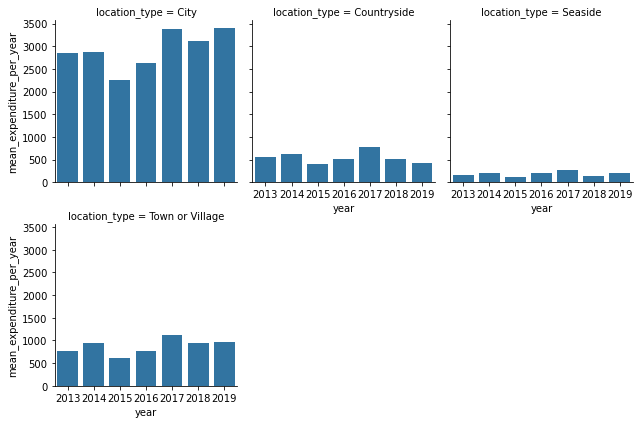

In [138]:
grid_location_expenditure = sns.FacetGrid(location_expenditure, col='location_type', col_wrap=3)
grid_location_expenditure.map_dataframe(sns.barplot, x='year', y='mean_expenditure_per_year')

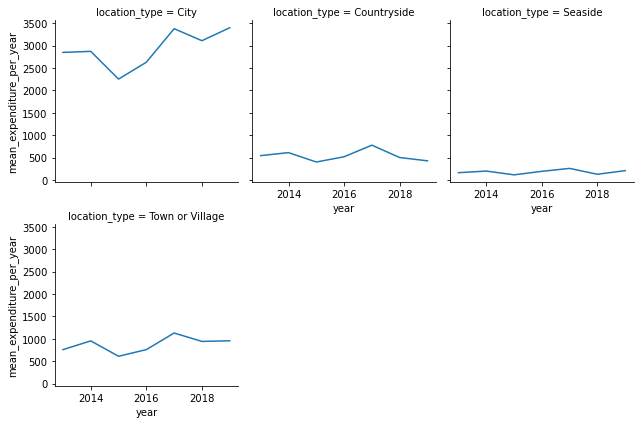

In [139]:
grid_location_expenditure = sns.FacetGrid(location_expenditure, col='location_type', col_wrap=3)
grid_location_expenditure.map_dataframe(sns.lineplot, x='year', y='mean_expenditure_per_year')

<AxesSubplot:xlabel='year', ylabel='mean_expenditure_per_year'>

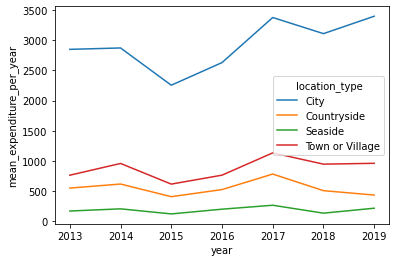

In [140]:
sns.lineplot(data=location_expenditure,
            x='year',
            y='mean_expenditure_per_year',
            hue='location_type')

# IS_CITY EXPENDITURE

In [141]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby('is_city')
    .value
    .sum()
    .reset_index(name='total_expenditure')
)

is_city  total_expenditure
0      City              20497
1  Not City              19829

<AxesSubplot:xlabel='is_city', ylabel='total_expenditure'>

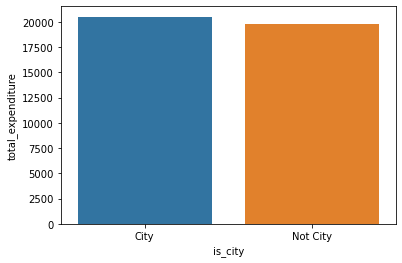

In [142]:
sns.barplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby('is_city')
    .value
    .sum()
    .reset_index(name='total_expenditure')
),
            x='is_city',
            y='total_expenditure')

In [143]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby(['is_city', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure')
)

is_city  year  total_expenditure
0       City  2013               2850
1       City  2014               2873
2       City  2015               2254
3       City  2016               2630
4       City  2017               3379
5       City  2018               3111
6       City  2019               3400
7   Not City  2013               2554
8   Not City  2014               3120
9   Not City  2015               1971
10  Not City  2016               2622
11  Not City  2017               3817
12  Not City  2018               2772
13  Not City  2019               2973

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

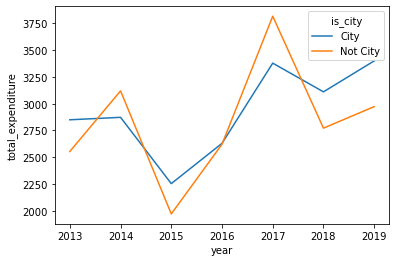

In [144]:
sns.lineplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby(['is_city', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure')
),
             x='year',
             y='total_expenditure',
             hue='is_city')

# IS_CITY VISITS

In [145]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.location_type != 'All'), :]
    .groupby('is_city')
    .value
    .sum()
    .reset_index(name='total_visits')
)

is_city  total_visits
0      City           431
1  Not City           601

<AxesSubplot:xlabel='is_city', ylabel='total_visits'>

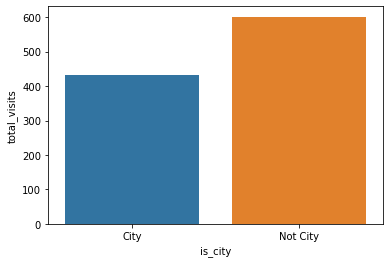

In [146]:
sns.barplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.location_type != 'All'), :]
    .groupby('is_city')
    .value
    .sum()
    .reset_index(name='total_visits')
),
            x='is_city',
            y='total_visits')

<AxesSubplot:xlabel='year', ylabel='total_visits'>

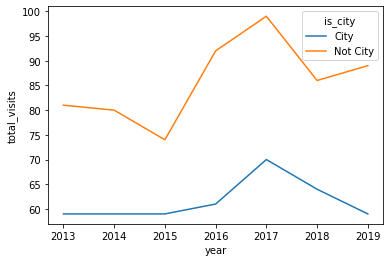

In [147]:
sns.lineplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.location_type != 'All'), :]
    .groupby(['is_city', 'year'])
    .value
    .sum()
    .reset_index(name='total_visits')
),
             x='year',
             y='total_visits',
             hue='is_city')

# Question 4

#### Is there a particular method of travel our visitors arrive by?
#### Some of our locations are remote and not easily accessible by public transport, so this would be good information to have.

In [148]:
(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('transport_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

transport_type
Car      633.2
Rail     111.2
Other     94.6
Bus       90.5
Plane      7.1
Boat       3.3
Name: value, dtype: float64

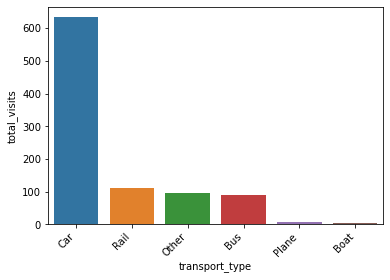

In [149]:
sns.barplot(data=(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('transport_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='transport_type',
            y='total_visits')
plt.xticks(rotation=45, ha='right')

plt.show()

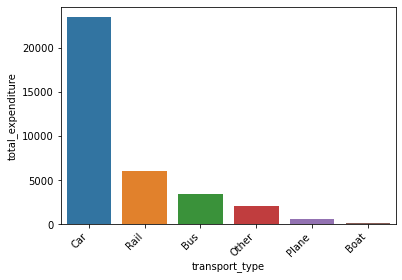

In [150]:
sns.barplot(data=(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('transport_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='transport_type',
            y='total_expenditure')
plt.xticks(rotation=45, ha='right')

plt.show()

<AxesSubplot:xlabel='year', ylabel='total_visits'>

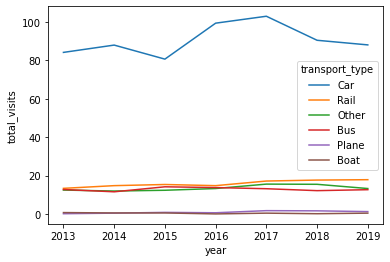

In [151]:
sns.lineplot(data=(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['transport_type', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='year',
            y='total_visits',
        hue='transport_type')

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

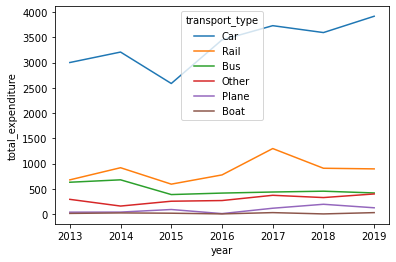

In [152]:
sns.lineplot(data=(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['transport_type', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='year',
            y='total_expenditure',
        hue='transport_type')

In [153]:
(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('method_of_travel')
    .value
    .sum()
    .sort_values(ascending=False)
)

method_of_travel
Car - own/friends/family         586.6
Train                            105.4
Bus or Coach - Regular            90.5
Walked                            58.4
Taxi                              27.9
Car - hired                       18.7
Bus or Coach - Organised Tour     12.3
Other                              9.0
Bicycle                            7.9
Plane                              7.1
Tube                               3.7
Boat/Ship/Ferry                    3.3
Caravan/Campervan                  2.6
Tram                               2.1
Lorry/Truck/Van                    2.1
Bus or Coach - Minibus             1.4
Motor cycle                        0.9
Name: value, dtype: float64

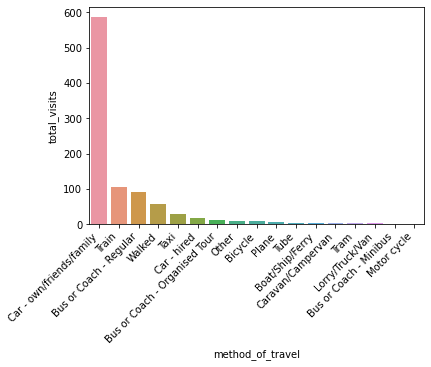

In [154]:
sns.barplot(data=(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('method_of_travel')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='method_of_travel',
            y='total_visits')
plt.xticks(rotation=45, ha='right')

plt.show()

In [155]:
(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('is_car')
    .value
    .sum()
    .reset_index(name='total_visits')
)

is_car  total_visits
0      Car         633.2
1  Not car         306.7

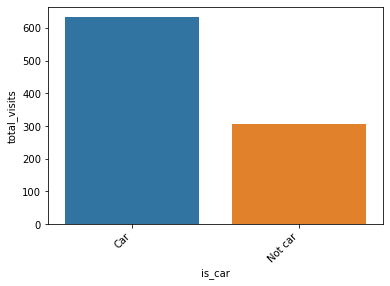

In [156]:
sns.barplot(data=(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('is_car')
    .value
    .sum()
    .reset_index(name='total_visits')
),
            x='is_car',
            y='total_visits')
plt.xticks(rotation=45, ha='right')

plt.show()

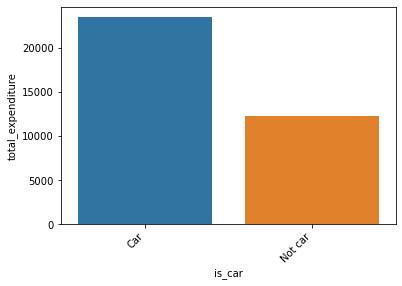

In [157]:
sns.barplot(data=(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('is_car')
    .value
    .sum()
    .reset_index(name='total_expenditure')
),
            x='is_car',
            y='total_expenditure')
plt.xticks(rotation=45, ha='right')

plt.show()

<AxesSubplot:xlabel='year', ylabel='total_visits'>

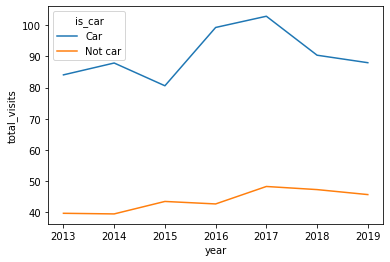

In [158]:
sns.lineplot(data=(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['is_car', 'year'])
    .value
    .sum()
    .reset_index(name='total_visits')
),
             x='year',
             y='total_visits',
             hue='is_car')

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

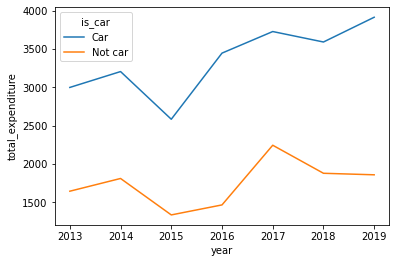

In [159]:
sns.lineplot(data=(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['is_car', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure')
),
             x='year',
             y='total_expenditure',
             hue='is_car')

# Question 5

#### When looking at regional tourism, what insights can we gain?
#### Where are our visitors from?
#### How do they differ in the money they spend, nights they spend in Scotland, or number of visits they do?

# TOTAL EXPENDITURE

In [160]:
(
    regional_tourism
    .loc[(regional_tourism.featurecode == 'S92000003') &
         (regional_tourism.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('years')
    .value
    .sum()
    .reset_index(name='total_expenditure')
    .sort_values('years')
)

years  total_expenditure
0  2009-2011               5312
1  2010-2012               5527
2  2011-2013               5760
3  2012-2014               5679
4  2013-2015               5953
5  2014-2016               5965
6  2015-2017               6068
7  2016-2018               5716
8  2017-2019               5919

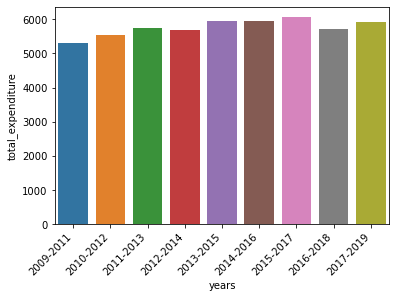

In [161]:
sns.barplot(data=(
    regional_tourism
    .loc[(regional_tourism.featurecode == 'S92000003') &
         (regional_tourism.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('years')
    .value
    .sum()
    .reset_index(name='total_expenditure')
    .sort_values('years')
),
             x='years',
             y='total_expenditure')

plt.xticks(rotation=45, ha='right')

plt.show()

<AxesSubplot:xlabel='total_expenditure', ylabel='region_name'>

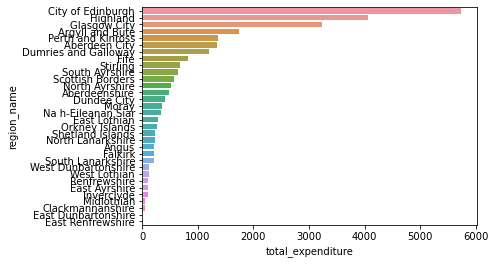

In [162]:
sns.barplot(data=(
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') &
         (regional_tourism.breakdown_of_domestic_tourism == 'Expenditure') &
         (regional_tourism.region_of_residence == 'All of GB'), :]
    .groupby(['region_of_residence', 'region_name'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='total_expenditure',
            y='region_name')

In [163]:
region_expenditure = (
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') & (regional_tourism.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['region_of_residence', 'region_name'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_region')
)

region_expenditure

region_of_residence          region_name  total_expenditure_per_region
0            All of GB    City of Edinburgh                          5733
1              England    City of Edinburgh                          4394
2            All of GB             Highland                          4066
3            All of GB         Glasgow City                          3242
4              England         Glasgow City                          2160
..                 ...                  ...                           ...
91           All of GB    East Renfrewshire                             6
92            Scotland  East Dunbartonshire                             5
93            Scotland    East Renfrewshire                             3
94             England  East Dunbartonshire                             3
95             England    East Renfrewshire                             0

[96 rows x 3 columns]

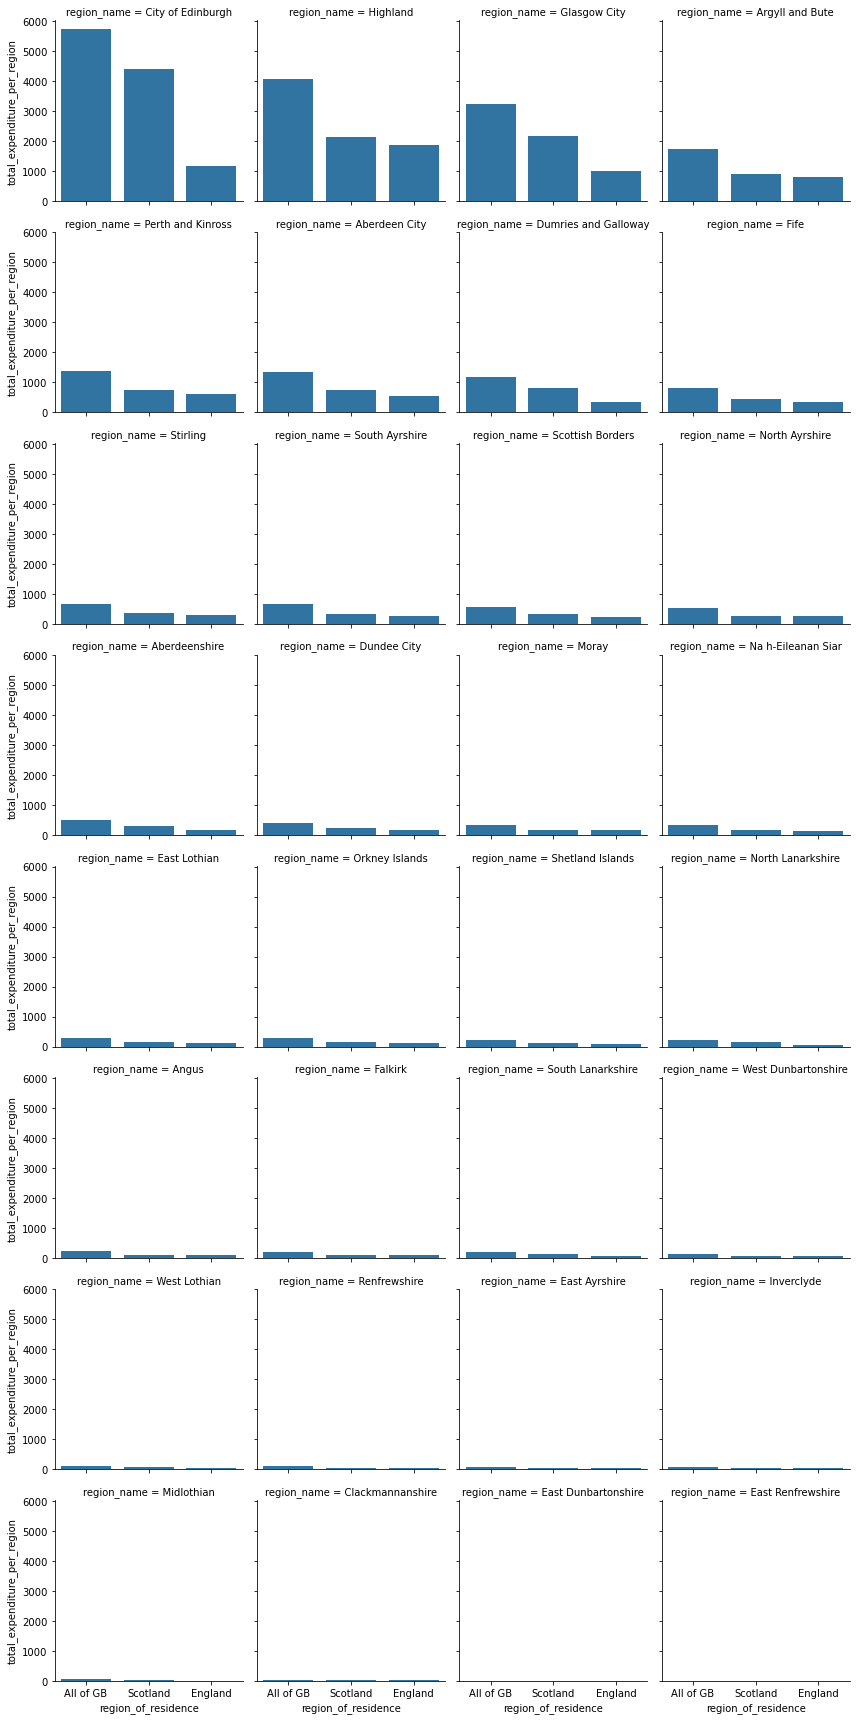

In [164]:
grid_region_expenditure = sns.FacetGrid(region_expenditure, col='region_name', col_wrap=4)
grid_region_expenditure.map_dataframe(sns.barplot, x='region_of_residence', y='total_expenditure_per_region')

In [165]:
region_expenditure_years = (
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') & (regional_tourism.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['years', 'region_name'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_year')
    .sort_values('years')
)

region_expenditure_years

years         region_name  total_expenditure_per_year
181  2009-2011  Na h-Eileanan Siar                          45
241  2009-2011       East Ayrshire                          18
32   2009-2011     Argyll and Bute                         367
153  2009-2011               Moray                          64
42   2009-2011       Aberdeen City                         314
..         ...                 ...                         ...
254  2017-2019    Shetland Islands                          13
63   2017-2019       Aberdeen City                         221
258  2017-2019          Midlothian                          10
124  2017-2019         Dundee City                          91
97   2017-2019    Scottish Borders                         124

[288 rows x 3 columns]

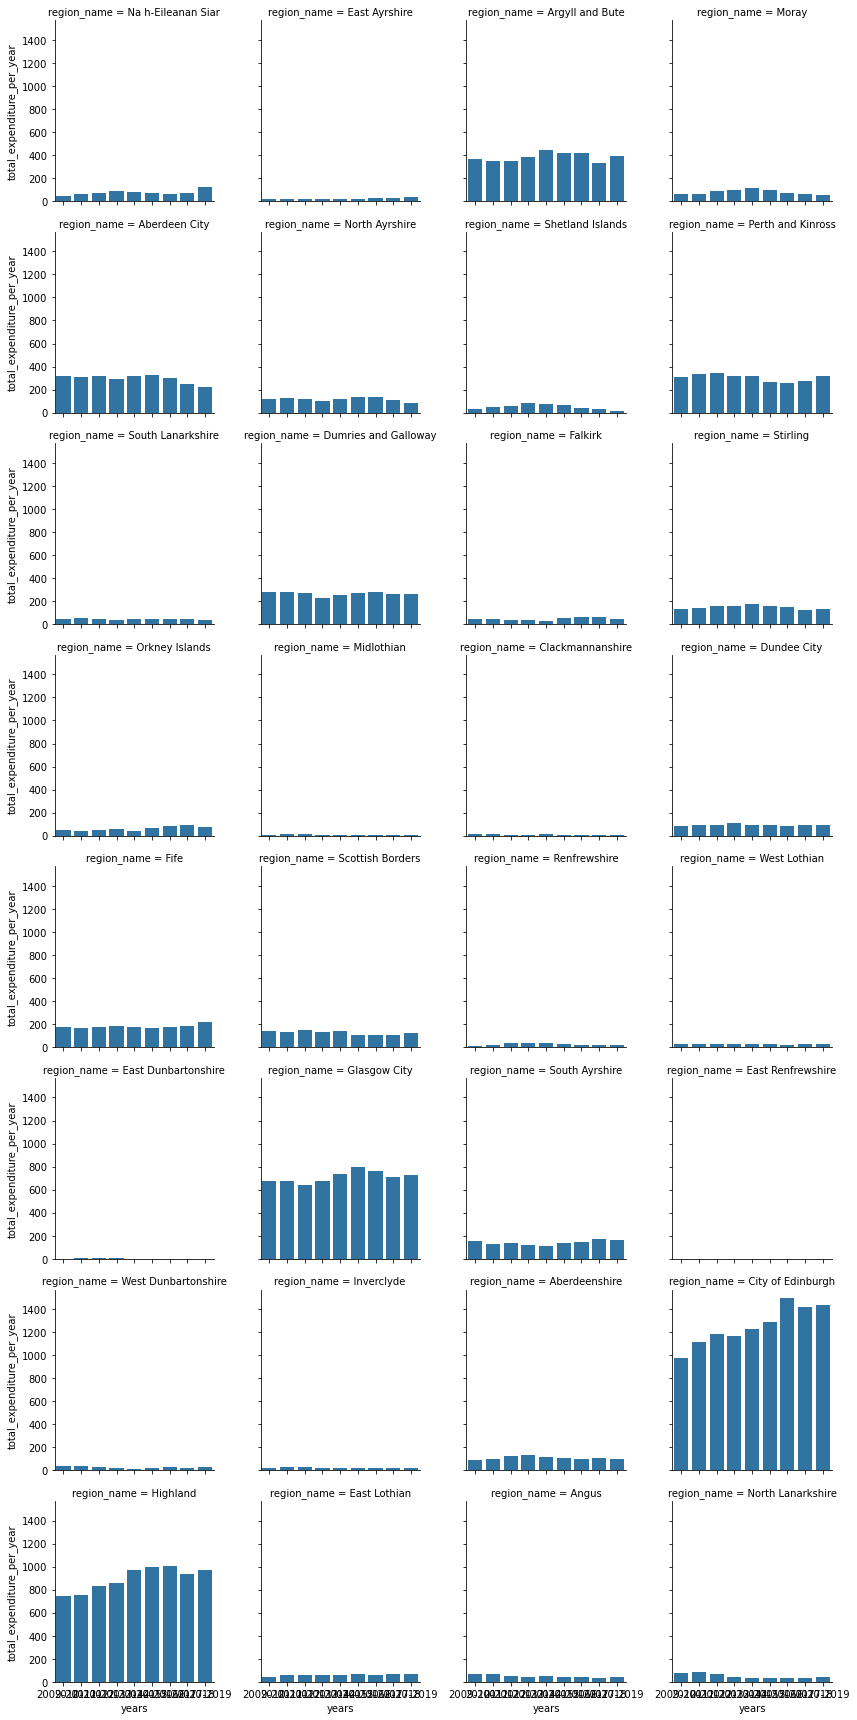

In [166]:
grid_region_expenditure_years = sns.FacetGrid(region_expenditure_years, col='region_name', col_wrap=4)
grid_region_expenditure_years.map_dataframe(sns.barplot, x='years', y='total_expenditure_per_year')

# TOTAL VISITS

<AxesSubplot:xlabel='total_visits', ylabel='region_name'>

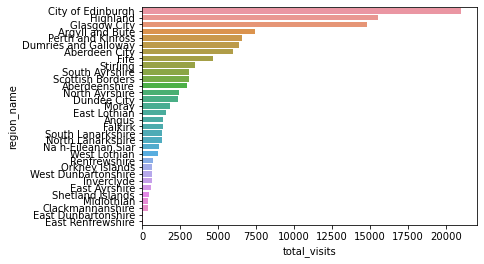

In [167]:
sns.barplot(data=(
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') &
         (regional_tourism.breakdown_of_domestic_tourism == 'Visits') &
         (regional_tourism.region_of_residence == 'All of GB'), :]
    .groupby(['region_of_residence', 'region_name'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='total_visits',
            y='region_name')

In [168]:
region_visits = (
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') & (regional_tourism.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['region_of_residence', 'region_name'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visit_per_region')
)

region_visits

region_of_residence          region_name  total_visit_per_region
0            All of GB    City of Edinburgh                   20991
1            All of GB             Highland                   15507
2            All of GB         Glasgow City                   14825
3              England    City of Edinburgh                   14156
4             Scotland             Highland                    9140
..                 ...                  ...                     ...
91            Scotland  East Dunbartonshire                      55
92           All of GB    East Renfrewshire                      52
93             England    East Renfrewshire                      26
94             England  East Dunbartonshire                      24
95            Scotland    East Renfrewshire                      21

[96 rows x 3 columns]

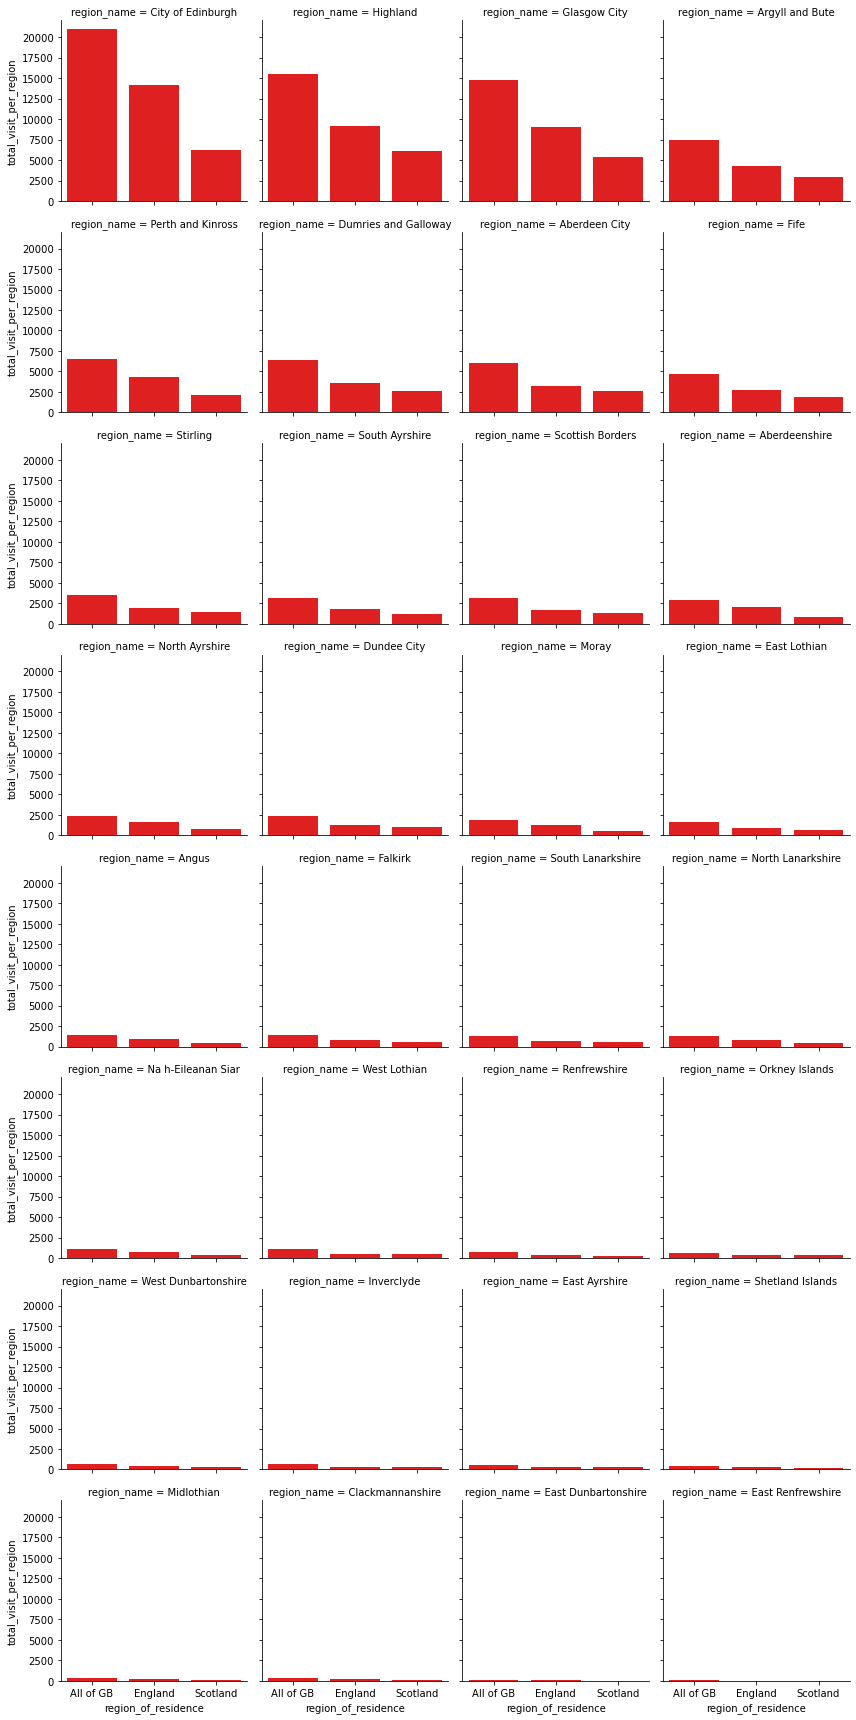

In [169]:
grid_region_visit = sns.FacetGrid(region_visits, col='region_name', col_wrap=4)
grid_region_visit.map_dataframe(sns.barplot, x='region_of_residence', y='total_visit_per_region', color='red')

In [170]:
region_visits_years = (
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') & (regional_tourism.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['years', 'region_name'])
    .value
    .sum()
    .reset_index(name='total_visit_per_year')
    .sort_values('years')
)

region_visits_years

years          region_name  total_visit_per_year
0    2009-2011        Aberdeen City                  1440
31   2009-2011         West Lothian                   310
30   2009-2011  West Dunbartonshire                   188
29   2009-2011             Stirling                   720
28   2009-2011    South Lanarkshire                   361
..         ...                  ...                   ...
257  2017-2019        Aberdeenshire                   717
256  2017-2019        Aberdeen City                  1083
286  2017-2019  West Dunbartonshire                   140
270  2017-2019         Glasgow City                  3137
287  2017-2019         West Lothian                   190

[288 rows x 3 columns]

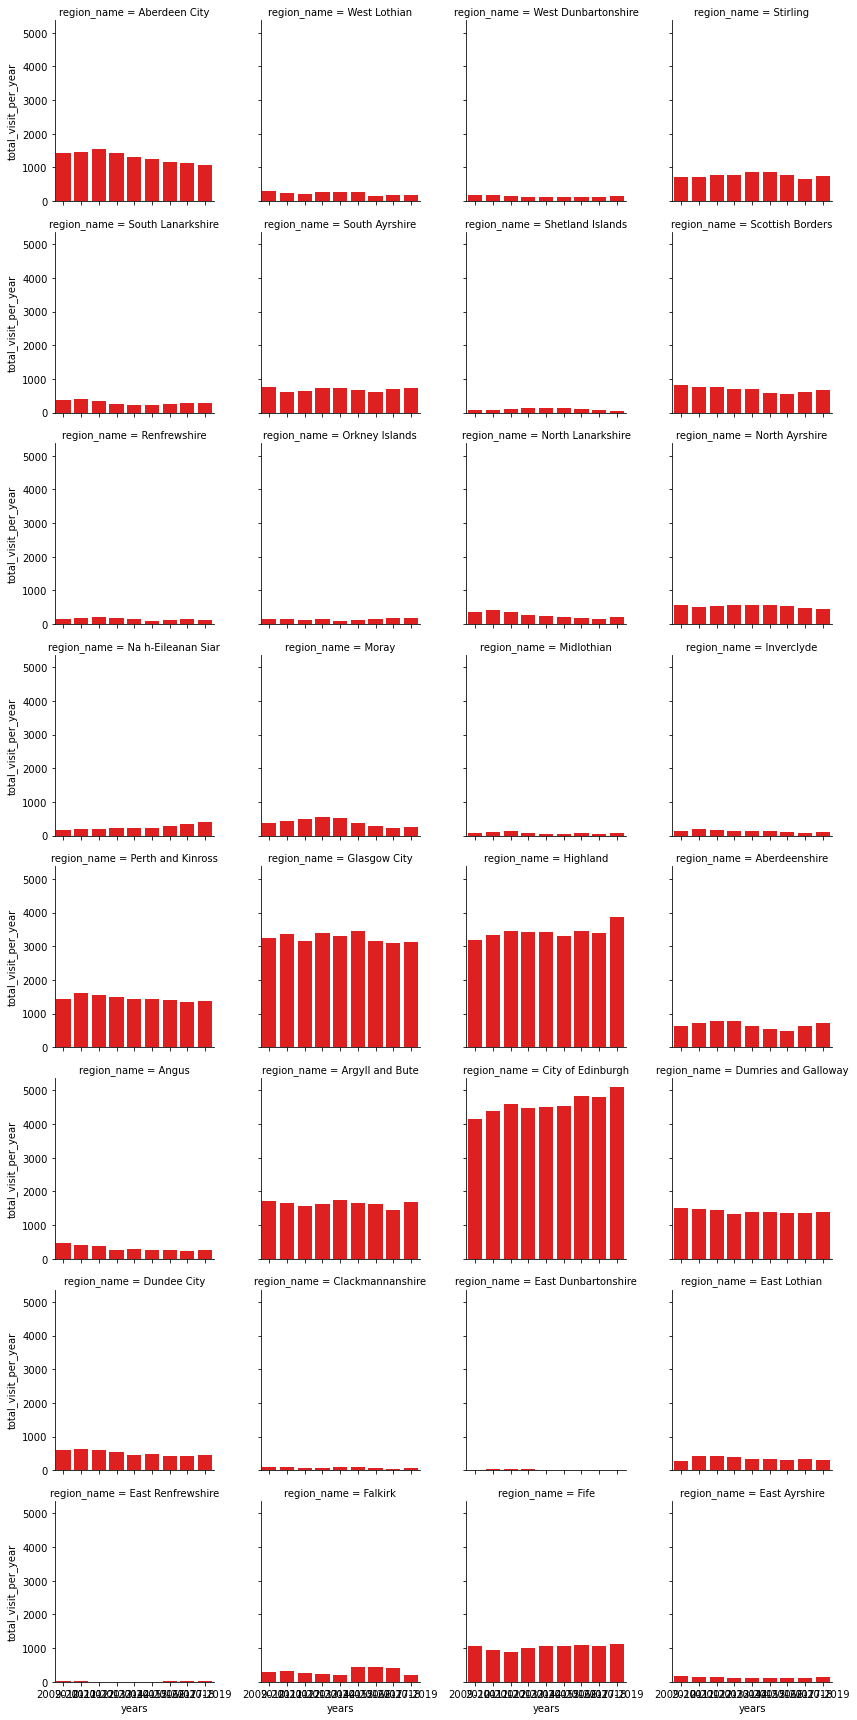

In [171]:
grid_region_visits_years = sns.FacetGrid(region_visits_years, col='region_name', col_wrap=4)
grid_region_visits_years.map_dataframe(sns.barplot, x='years', y='total_visit_per_year', color='red')

# TOTAL NIGHTS

<AxesSubplot:xlabel='total_nights', ylabel='region_name'>

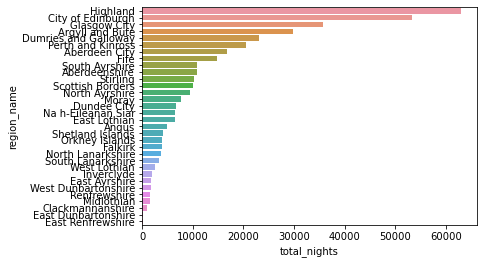

In [172]:
sns.barplot(data=(
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') &
         (regional_tourism.breakdown_of_domestic_tourism == 'Nights') &
         (regional_tourism.region_of_residence == 'All of GB'), :]
    .groupby(['region_of_residence', 'region_name'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_nights')
),
            x='total_nights',
            y='region_name')

In [173]:
region_nights = (
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') & (regional_tourism.breakdown_of_domestic_tourism == 'Nights'), :]
    .groupby(['region_of_residence', 'region_name'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_nights_per_region')
)

region_nights

region_of_residence          region_name  total_nights_per_region
0            All of GB             Highland                    62948
1            All of GB    City of Edinburgh                    53186
2              England    City of Edinburgh                    39305
3            All of GB         Glasgow City                    35629
4              England             Highland                    31000
..                 ...                  ...                      ...
91            Scotland  East Dunbartonshire                      132
92           All of GB    East Renfrewshire                       93
93             England    East Renfrewshire                       47
94             England  East Dunbartonshire                       45
95            Scotland    East Renfrewshire                       36

[96 rows x 3 columns]

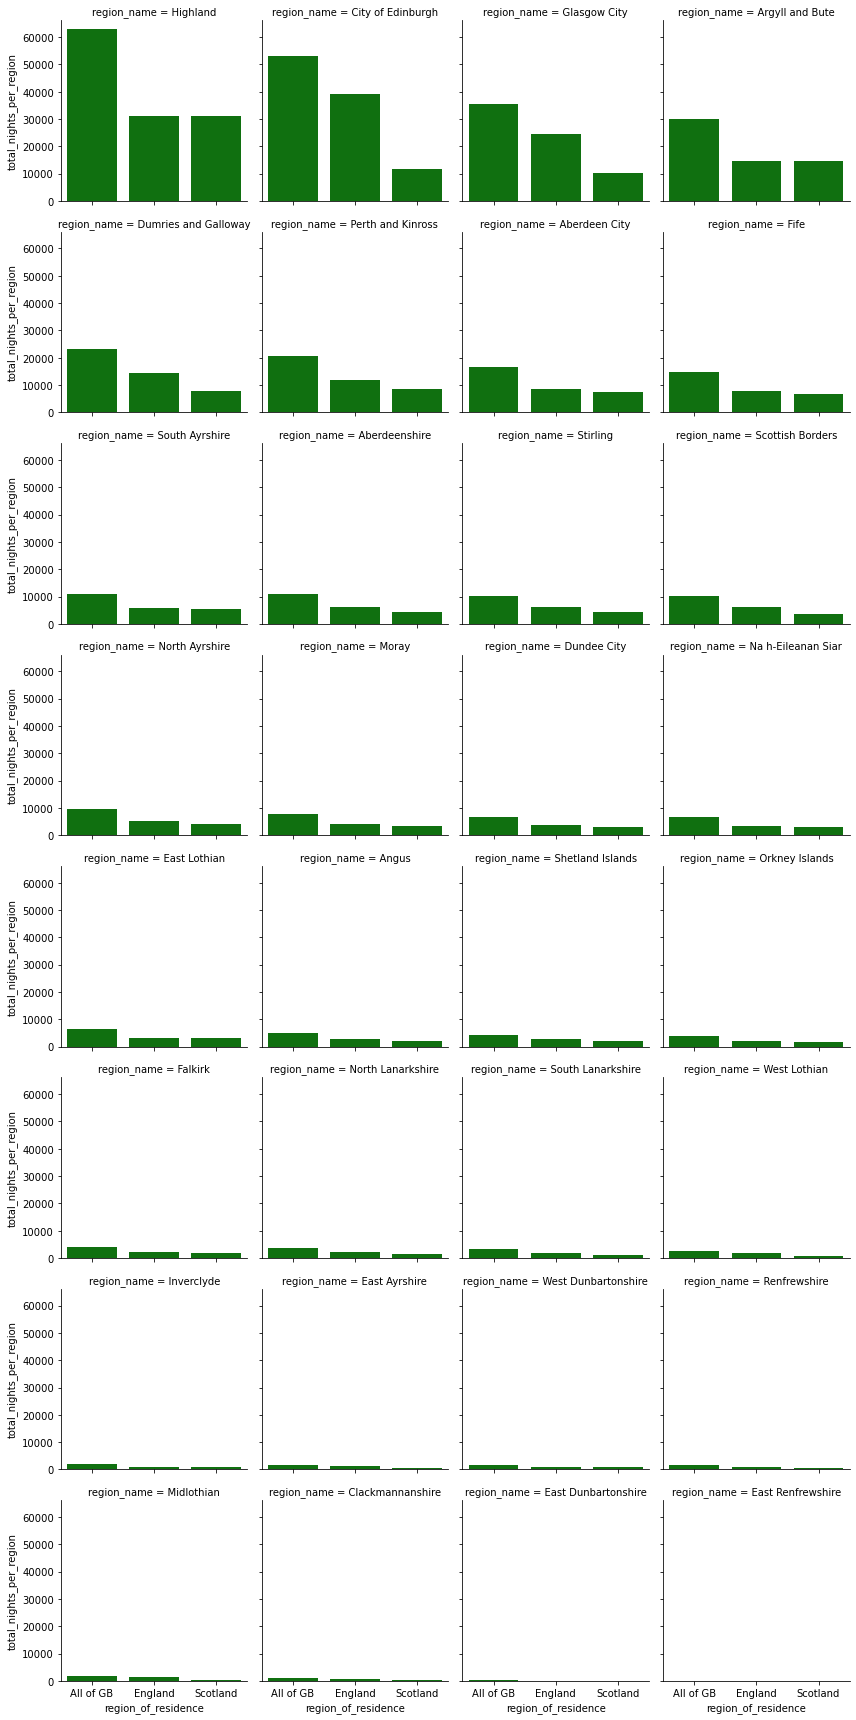

In [174]:
grid_region_nights = sns.FacetGrid(region_nights, col='region_name', col_wrap=4)
grid_region_nights.map_dataframe(sns.barplot, x='region_of_residence', y='total_nights_per_region', color='green')

In [175]:
region_nights_years = (
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') & (regional_tourism.breakdown_of_domestic_tourism == 'Nights'), :]
    .groupby(['years', 'region_name'])
    .value
    .sum()
    .reset_index(name='total_nights_per_year')
    .sort_values('years')
)

region_nights_years

years          region_name  total_nights_per_year
0    2009-2011        Aberdeen City                   4165
31   2009-2011         West Lothian                    942
30   2009-2011  West Dunbartonshire                    581
29   2009-2011             Stirling                   2570
28   2009-2011    South Lanarkshire                   1036
..         ...                  ...                    ...
257  2017-2019        Aberdeenshire                   2376
256  2017-2019        Aberdeen City                   3073
286  2017-2019  West Dunbartonshire                    348
270  2017-2019         Glasgow City                   7156
287  2017-2019         West Lothian                    436

[288 rows x 3 columns]

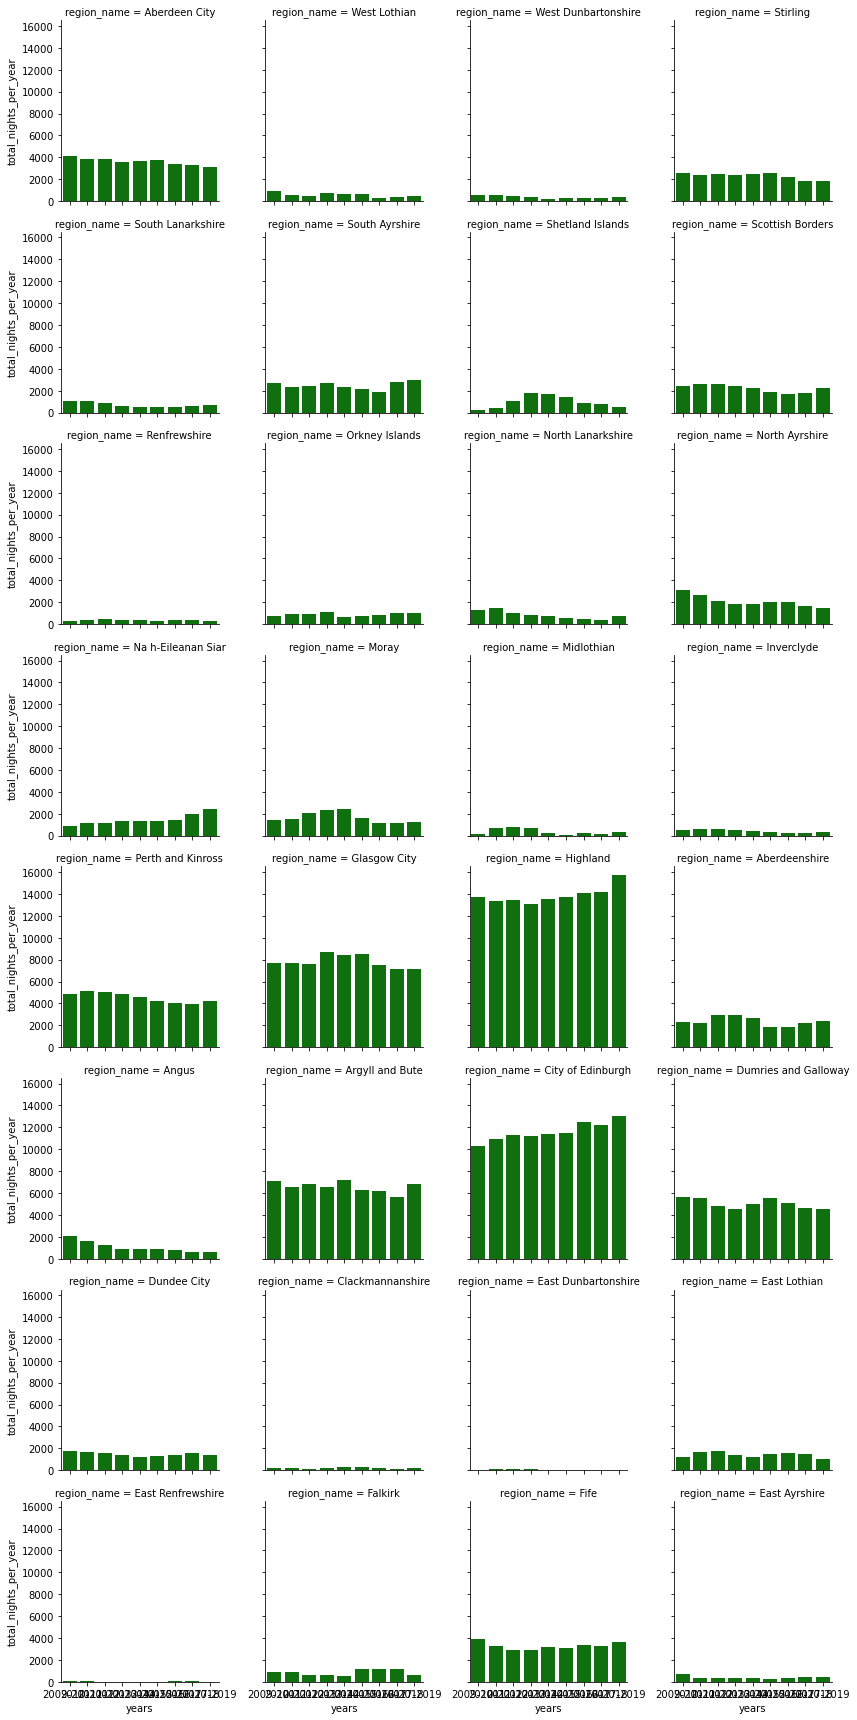

In [176]:
grid_region_nights_years = sns.FacetGrid(region_nights_years, col='region_name', col_wrap=4)
grid_region_nights_years.map_dataframe(sns.barplot, x='years', y='total_nights_per_year', color='green')

In [177]:
regional_tourism_expenditure = (
    regional_tourism
    .loc[(regional_tourism.featurecode == 'S92000003') & (regional_tourism.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('region_of_residence')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
)

regional_tourism_expenditure

region_of_residence  total_expenditure
0           All of GB              26291
1             England              15781
2            Scotland               9827

In [178]:
new_row_expenditure = {
    'region_of_residence': 'Rest of GB',
    'total_expenditure': (26291 - 15781 - 9827)
}

new_row_expenditure

{'region_of_residence': 'Rest of GB', 'total_expenditure': 683}

In [179]:
regional_tourism_expenditure = regional_tourism_expenditure.append(new_row_expenditure, ignore_index=True)

regional_tourism_expenditure

/var/folders/xp/pxq000_97vz2g8qfqw7qtgvm0000gn/T/ipykernel_79727/741911556.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_tourism_expenditure = regional_tourism_expenditure.append(new_row_expenditure, ignore_index=True)


region_of_residence  total_expenditure
0           All of GB              26291
1             England              15781
2            Scotland               9827
3          Rest of GB                683

<AxesSubplot:xlabel='region_of_residence', ylabel='total_expenditure'>

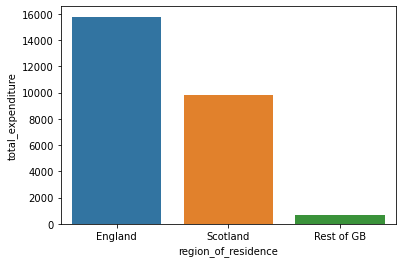

In [180]:
sns.barplot(data=(
    regional_tourism_expenditure
    .loc[regional_tourism_expenditure.region_of_residence != 'All of GB', :]
),
           x='region_of_residence',
           y='total_expenditure')

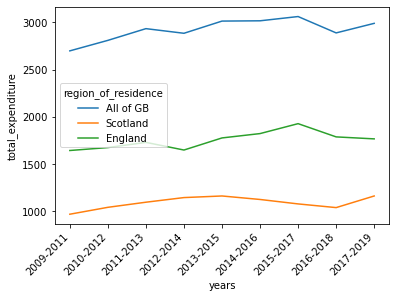

In [181]:
sns.lineplot(data=(
    regional_tourism
    .loc[(regional_tourism.featurecode == 'S92000003') &
         (regional_tourism.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['region_of_residence', 'years'])
    .value
    .sum()
    .reset_index(name='total_expenditure')
    .sort_values('years')
),
            x='years',
            y='total_expenditure',
            hue='region_of_residence')

plt.xticks(rotation=45, ha='right')

plt.show()

In [182]:
regional_tourism_visits = (
    regional_tourism
    .loc[(regional_tourism.featurecode == 'S92000003') & 
         (regional_tourism.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('region_of_residence')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
)

regional_tourism_visits

region_of_residence  total_visits
0           All of GB        111034
1            Scotland         55725
2             England         53143

In [183]:
new_row_visits = {
    'region_of_residence': 'Rest of GB',
    'total_visits': (111034 - 55725 - 53143)
}

new_row_visits

{'region_of_residence': 'Rest of GB', 'total_visits': 2166}

In [184]:
regional_tourism_visits = regional_tourism_visits.append(new_row_visits, ignore_index=True)

regional_tourism_visits

/var/folders/xp/pxq000_97vz2g8qfqw7qtgvm0000gn/T/ipykernel_79727/2765205528.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_tourism_visits = regional_tourism_visits.append(new_row_visits, ignore_index=True)


region_of_residence  total_visits
0           All of GB        111034
1            Scotland         55725
2             England         53143
3          Rest of GB          2166

<AxesSubplot:xlabel='region_of_residence', ylabel='total_visits'>

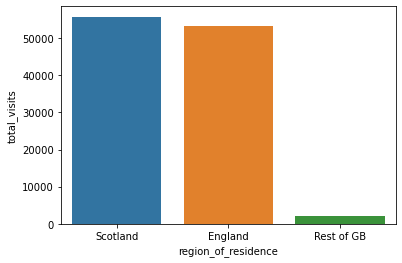

In [185]:
sns.barplot(data=(
    regional_tourism_visits
    .loc[regional_tourism_visits.region_of_residence != 'All of GB', :]
),
           x='region_of_residence',
           y='total_visits')

In [186]:
regional_tourism_nights = (
    regional_tourism
    .loc[(regional_tourism.featurecode == 'S92000003')
         & (regional_tourism.breakdown_of_domestic_tourism == 'Nights'), :]
    .groupby('region_of_residence')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_nights')
)

regional_tourism_nights

region_of_residence  total_nights
0           All of GB        378896
1             England        211241
2            Scotland        158278

In [187]:
new_row_nights = {
    'region_of_residence': 'Rest of GB',
    'total_nights': (378896 - 211241 - 158278)
}

new_row_nights

{'region_of_residence': 'Rest of GB', 'total_nights': 9377}

In [188]:
regional_tourism_nights = regional_tourism_nights.append(new_row_nights, ignore_index=True)

regional_tourism_nights

/var/folders/xp/pxq000_97vz2g8qfqw7qtgvm0000gn/T/ipykernel_79727/3540154970.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regional_tourism_nights = regional_tourism_nights.append(new_row_nights, ignore_index=True)


region_of_residence  total_nights
0           All of GB        378896
1             England        211241
2            Scotland        158278
3          Rest of GB          9377

<AxesSubplot:xlabel='region_of_residence', ylabel='total_nights'>

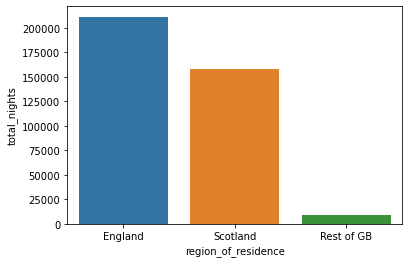

In [189]:
sns.barplot(data=(
    regional_tourism_nights
    .loc[regional_tourism_nights.region_of_residence != 'All of GB', :]
),
           x='region_of_residence',
           y='total_nights')

In [190]:
    (
        regional_tourism
    .loc[(regional_tourism.featurecode == 'S92000003')
         & (regional_tourism.breakdown_of_domestic_tourism == 'Nights'), :]
    .groupby(['region_of_residence', 'years'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_nights')
    )

region_of_residence      years  total_nights
0            All of GB  2009-2011         44671
1            All of GB  2010-2012         44181
2            All of GB  2011-2013         43876
3            All of GB  2012-2014         42551
4            All of GB  2017-2019         41937
5            All of GB  2013-2015         41890
6            All of GB  2014-2016         40607
7            All of GB  2015-2017         39759
8            All of GB  2016-2018         39424
9              England  2009-2011         25103
10             England  2011-2013         24459
11             England  2010-2012         24112
12             England  2015-2017         23109
13             England  2017-2019         23002
14             England  2012-2014         22965
15             England  2013-2015         22957
16             England  2016-2018         22836
17             England  2014-2016         22698
18            Scotland  2010-2012         18949
19            Scotland  2012-2014         18464
20            Scotland  2009-2011         18434
21            Scotland  2011-2013         18188
22            Scotland  2017-2019         17996
23            Scotland  2013-2015         17977
24            Scotland  2014-2016         16936
25            Scotland  2015-2017         15759
26            Scotland  2016-2018         15575

<AxesSubplot:xlabel='region_of_residence', ylabel='total_expenditure'>

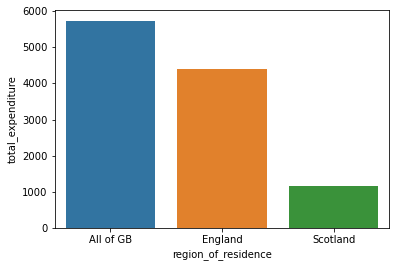

In [191]:
sns.barplot(data=(
    regional_tourism
    .loc[(regional_tourism.region_name == 'City of Edinburgh') &
        (regional_tourism.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('region_of_residence')
    .value
    .sum()
    .reset_index(name='total_expenditure')
),
           x='region_of_residence',
           y='total_expenditure')

# Question 6

#### What type of accommodation is most popular?
#### Is there a difference by location?

### Create column to separate 'All'

In [192]:
accommodation_occupancy = (
    accommodation_occupancy
    .assign(accom = np.where(accommodation_occupancy.weekday_weekend != 'All', accommodation_occupancy.weekday_weekend,
                    np.where(accommodation_occupancy.size_of_accommodation != 'All', accommodation_occupancy.size_of_accommodation,
                    np.where(accommodation_occupancy.location != 'All', accommodation_occupancy.location, 'All')))
           )
)

accommodation_occupancy

year  value       units accommodation_type   occupancy_type  \
0    2012  52.32  Percentage   Guest House/B&B    Room Occupancy   
1    2015  49.18  Percentage   Guest House/B&B    Room Occupancy   
2    2018  63.57  Percentage   Guest House/B&B    Room Occupancy   
3    2013  53.35  Percentage   Guest House/B&B    Room Occupancy   
4    2018  40.45  Percentage   Guest House/B&B    Room Occupancy   
..    ...    ...         ...                ...              ...   
706  2015  73.47  Percentage            Hotels    Room Occupancy   
707  2013  35.69  Percentage           Hostels     Bed Occupancy   
708  2011  38.62  Percentage           Hostels     Bed Occupancy   
709  2015  24.37  Percentage            Hotels    Room Occupancy   
710  2017  56.37  Percentage           Hostels     Bed Occupancy   

    weekday_weekend size_of_accommodation                location  \
0               All                   All  Accessible Small Towns   
1               All                   All       Large Urban Areas   
2               All                   All       Large Urban Areas   
3               All                   All        Accessible Rural   
4               All                   All        Accessible Rural   
..              ...                   ...                     ...   
706             All         Rooms: 51-100                     All   
707             All                   All            Remote Rural   
708             All                   All  Accessible Small Towns   
709             All          Rooms: 01-03                     All   
710             All                   All                     All   

     is_accessible  is_urban                   accom  
0             True     False  Accessible Small Towns  
1             True      True       Large Urban Areas  
2             True      True       Large Urban Areas  
3             True     False        Accessible Rural  
4             True     False        Accessible Rural  
..             ...       ...                     ...  
706          False     False           Rooms: 51-100  
707          False     False            Remote Rural  
708           True     False  Accessible Small Towns  
709          False     False            Rooms: 01-03  
710          False     False                     All  

[711 rows x 11 columns]

In [193]:
(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby('accommodation_type')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage')
)

accommodation_type  average_occupancy_percentage
0                   Hotels                      56.075238
1                  Hostels                      48.565139
2            Self Catering                      48.330741
3          Guest House/B&B                      45.164192
4  Caravan & Camping Parks                      38.920278

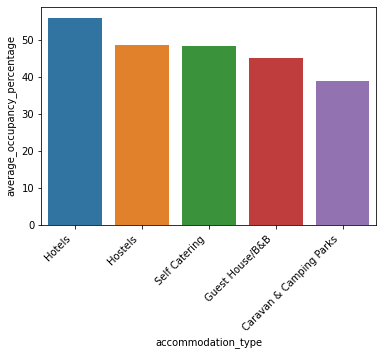

In [194]:
sns.barplot(data=(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby('accommodation_type')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage')
),
            x='accommodation_type',
            y='average_occupancy_percentage')

plt.xticks(rotation=45, ha='right')

plt.show()

In [195]:
accomm_occ = (
   accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby(['accommodation_type', 'year'])
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage') 
)

accomm_occ

accommodation_type  year  average_occupancy_percentage
0                    Hotels   2017                     59.191786
1                   Hostels   2016                     59.116250
2                    Hotels   2016                     58.638929
3                    Hotels   2014                     56.777143
4                    Hotels   2018                     56.735000
5                    Hotels   2015                     56.646071
6                    Hotels   2019                     56.010000
7                    Hotels   2013                     55.317143
8             Self Catering   2018                     53.280000
9                   Hostels   2015                     53.130000
10                   Hotels   2011                     52.930000
11            Self Catering   2017                     52.445000
12                   Hotels   2012                     52.431071
13                  Hostels   2017                     50.811250
14            Self Catering   2016                     50.740000
15            Self Catering   2015                     50.223333
16                  Hostels   2019                     49.975000
17                  Hostels   2014                     49.552500
18          Guest House/B&B   2018                     48.841364
19                  Hostels   2018                     48.583750
20          Guest House/B&B   2019                     48.496818
21            Self Catering   2014                     48.161667
22            Self Catering   2013                     47.078333
23          Guest House/B&B   2017                     46.925455
24            Self Catering   2012                     46.923333
25                  Hostels   2013                     45.458750
26          Guest House/B&B   2013                     45.149091
27            Self Catering   2011                     45.123333
28          Guest House/B&B   2011                     44.707273
29          Guest House/B&B   2014                     44.461364
30          Guest House/B&B   2015                     44.458182
31  Caravan & Camping Parks   2016                     44.101250
32          Guest House/B&B   2012                     42.746364
33  Caravan & Camping Parks   2015                     41.760000
34  Caravan & Camping Parks   2014                     41.545000
35            Self Catering   2019                     41.001667
36  Caravan & Camping Parks   2011                     40.868750
37                  Hostels   2012                     40.805000
38          Guest House/B&B   2016                     40.691818
39  Caravan & Camping Parks   2013                     40.586250
40                  Hostels   2011                     39.653750
41  Caravan & Camping Parks   2019                     38.953750
42  Caravan & Camping Parks   2018                     34.886250
43  Caravan & Camping Parks   2017                     33.895000
44  Caravan & Camping Parks   2012                     33.686250

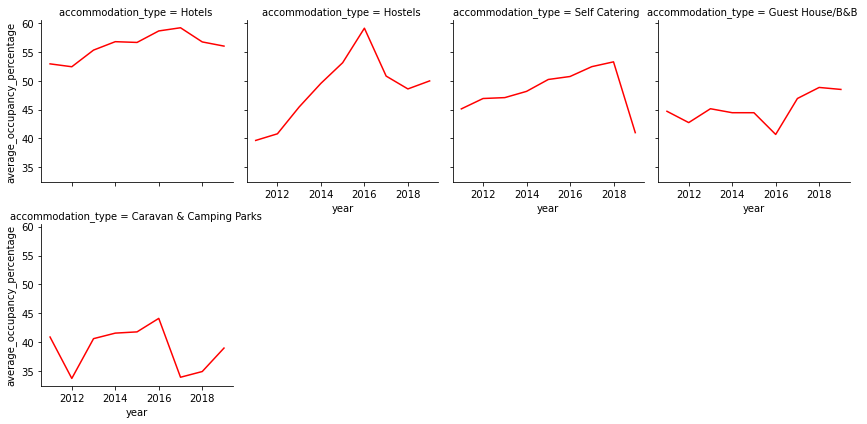

In [196]:
grid_accomm_occ = sns.FacetGrid(accomm_occ, col='accommodation_type', col_wrap=4)
grid_accomm_occ.map_dataframe(sns.lineplot, x='year', y='average_occupancy_percentage', color='red')

<AxesSubplot:xlabel='year', ylabel='average_occupancy_percentage_per_type'>

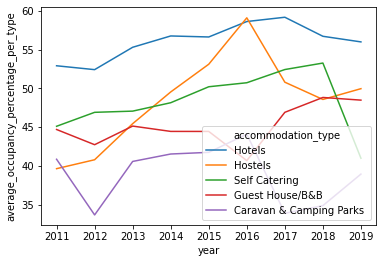

In [197]:
sns.lineplot(data=(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby(['accommodation_type', 'year'])
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage_per_type')
),
             x='year',
             y='average_occupancy_percentage_per_type',
             hue='accommodation_type')

In [198]:
(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby('accom')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage_per_variable')
)

accom  average_occupancy_percentage_per_variable
0   Rooms: greater than 100                                  65.990556
1             Rooms: 51-100                                  65.691111
2              Rooms: 26-50                                  60.918333
3         Large Urban Areas                                  56.047778
4              Rooms: 11-25                                  53.936667
5                   Weekend                                  52.539444
6         Other Urban Areas                                  52.094603
7          Accessible Rural                                  47.754286
8                   Weekday                                  47.131296
9    Accessible Small Towns                                  46.960317
10             Rooms: 04-10                                  46.829722
11             Remote Rural                                  46.454444
12       Remote Small Towns                                  45.715397
13             Rooms: 01-03                                  25.527222

<AxesSubplot:xlabel='average_occupancy_percentage_per_variable', ylabel='accom'>

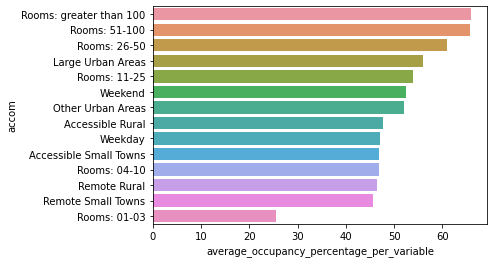

In [199]:
sns.barplot(data=(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby('accom')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage_per_variable')
),
            x='average_occupancy_percentage_per_variable',
            y='accom')

In [200]:
(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All') & (accommodation_occupancy.location != 'All'), :]
    .groupby('location')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage_per_location')
)

location  average_occupancy_percentage_per_location
0       Large Urban Areas                                  56.047778
1       Other Urban Areas                                  52.094603
2        Accessible Rural                                  47.754286
3  Accessible Small Towns                                  46.960317
4            Remote Rural                                  46.454444
5      Remote Small Towns                                  45.715397

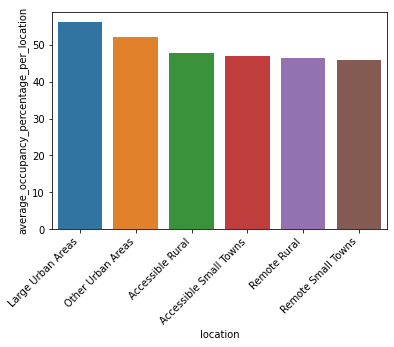

In [201]:
sns.barplot(data=(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All') & (accommodation_occupancy.location != 'All'), :]
    .groupby('location')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage_per_location')
),
            x='location',
            y='average_occupancy_percentage_per_location')

plt.xticks(rotation=45, ha='right')

plt.show()

In [202]:
(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby('is_urban')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage_per_location')
)

is_urban  average_occupancy_percentage_per_location
0      True                                  54.071190
1     False                                  48.217069

<AxesSubplot:xlabel='is_urban', ylabel='average_occupancy_percentage_per_location'>

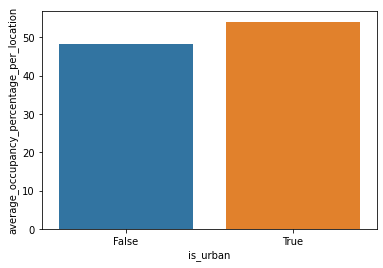

In [203]:
sns.barplot(data=(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby('is_urban')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage_per_location')
),
            x='is_urban',
            y='average_occupancy_percentage_per_location')

<AxesSubplot:xlabel='year', ylabel='average_occupancy_percentage_per_location'>

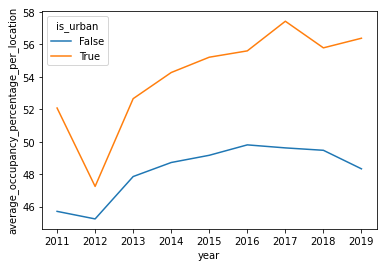

In [204]:
sns.lineplot(data=(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby(['is_urban', 'year'])
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage_per_location')
),
             x='year',
             y='average_occupancy_percentage_per_location',
             hue='is_urban')

In [205]:
(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby('is_accessible')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage_per_accessibility')
)

is_accessible  average_occupancy_percentage_per_accessibility
0           True                                       50.714246
1          False                                       48.490631

<AxesSubplot:xlabel='is_accessible', ylabel='average_occupancy_percentage_per_accessibility'>

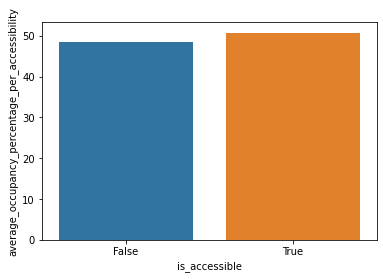

In [206]:
sns.barplot(data=(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby('is_accessible')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage_per_accessibility')
),
            x='is_accessible',
            y='average_occupancy_percentage_per_accessibility')

<AxesSubplot:xlabel='is_accessible', ylabel='value'>

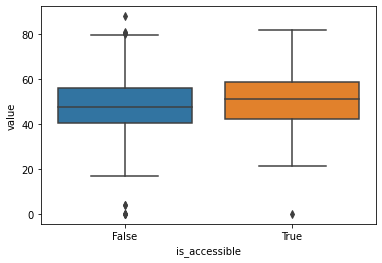

In [207]:
sns.boxplot(data=(
    accommodation_occupancy
    .loc[:, ['is_accessible', 'value']]
),
           x='is_accessible',
           y='value')

<AxesSubplot:xlabel='year', ylabel='average_occupancy_percentage_per_accessibility'>

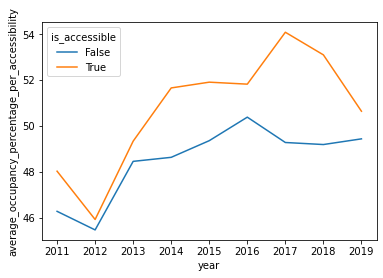

In [208]:
sns.lineplot(data=(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All'), :]
    .groupby(['is_accessible', 'year'])
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage_per_accessibility')
),
             x='year',
             y='average_occupancy_percentage_per_accessibility',
             hue='is_accessible')

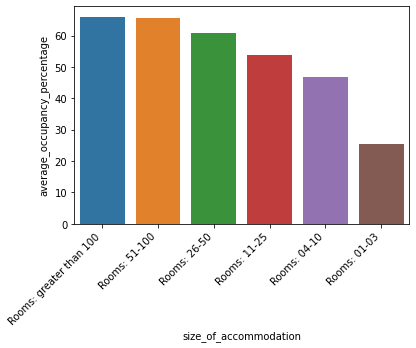

In [209]:
sns.barplot(data=(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All') & (accommodation_occupancy.size_of_accommodation != 'All'), :]
    .groupby('size_of_accommodation')
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage')
),
            x='size_of_accommodation',
            y='average_occupancy_percentage')

plt.xticks(rotation=45, ha='right')

plt.show()

<AxesSubplot:xlabel='year', ylabel='average_occupancy_percentage'>

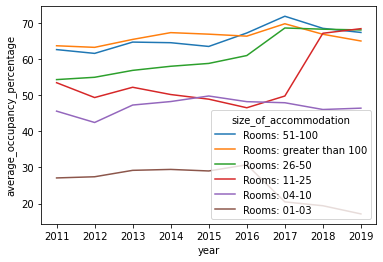

In [210]:
sns.lineplot(data=(
    accommodation_occupancy
    .loc[(accommodation_occupancy.accom != 'All') & (accommodation_occupancy.size_of_accommodation != 'All'), :]
    .groupby(['size_of_accommodation', 'year'])
    .value
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='average_occupancy_percentage')
),
            x='year',
            y='average_occupancy_percentage',
            hue='size_of_accommodation')

# INTERNATIONAL DATA

In [211]:
international['mode'].unique()

array(['Air', 'Tunnel', 'Sea'], dtype=object)

In [212]:
international.nights_thousands = international.nights_thousands.replace(',','', regex=True)
international.nights_thousands = pd.to_numeric(international.nights_thousands)

## Look at country - expenditure

In [213]:
(
    international
    .groupby('country')
    .expenditure_millions
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
    .head(10)
)

country  total_expenditure
0             USA        6140.003761
1         Germany        2689.946207
2       Australia        1651.542406
3          France        1621.349204
4          Canada        1455.180549
5           Spain        1261.378567
6           Italy        1236.938403
7     Netherlands        1153.147521
8  Irish Republic         882.722666
9           China         810.128818

<AxesSubplot:xlabel='total_expenditure', ylabel='country'>

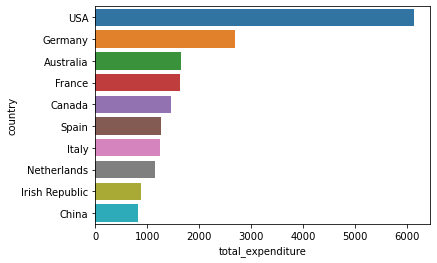

In [214]:
sns.barplot(data=(
    international
    .groupby('country')
    .expenditure_millions
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
    .head(10)
),
            x='total_expenditure',
            y='country')

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

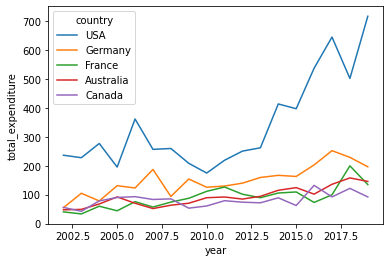

In [215]:
sns.lineplot(data=(
    international
    .loc[international.country.isin(['USA', 'Germany', 'Australia', 'France', 'Canada'])]
    .groupby(['country', 'year'])
    .expenditure_millions
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='year',
            y='total_expenditure',
            hue='country')

<AxesSubplot:xlabel='age', ylabel='total_expenditure'>

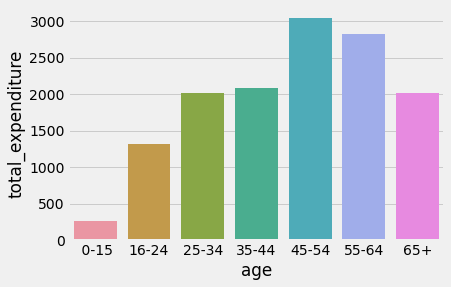

In [251]:
sns.barplot(data=(
    international
    .loc[international.country.isin(['USA', 'Germany', 'Australia', 'France', 'Canada'])]
    .groupby('age')
    .expenditure_millions
    .sum()
    .reset_index(name='total_expenditure')
    .head(10)
),
            y='total_expenditure',
            x='age')

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

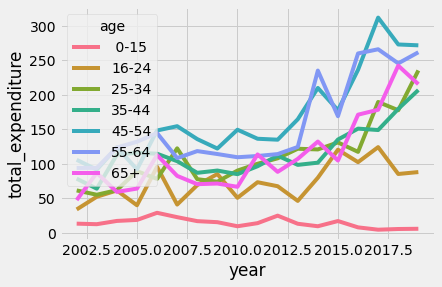

In [253]:
sns.lineplot(data=(
    international
    .loc[international.country.isin(['USA', 'Germany', 'Australia', 'France', 'Canada'])]
    .groupby(['age', 'year'])
    .expenditure_millions
    .sum()
    .reset_index(name='total_expenditure')
),
            x='year',
            y='total_expenditure',
            hue='age')

## Look at country - visits

In [216]:
(
    international
    .groupby('country')
    .visits_thousands
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
    .head(10)
)

country  total_expenditure
0             USA        7463.904666
1         Germany        4997.308169
2          France        3257.659491
3  Irish Republic        2624.255207
4       Australia        2319.491518
5     Netherlands        2318.831474
6           Spain        2261.425721
7           Italy        2207.066534
8          Canada        2154.508312
9          Poland        1383.971397

<AxesSubplot:xlabel='total_visits', ylabel='country'>

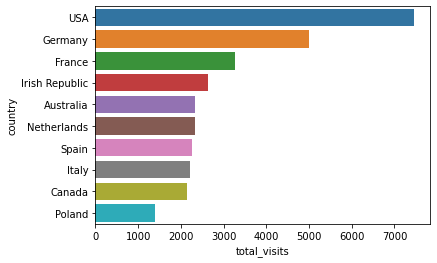

In [217]:
sns.barplot(data=(
    international
    .groupby('country')
    .visits_thousands
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
    .head(10)
),
            x='total_visits',
            y='country')

<AxesSubplot:xlabel='year', ylabel='total_visits'>

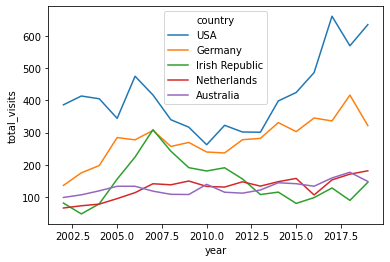

In [218]:
sns.lineplot(data=(
    international
    .loc[international.country.isin(['USA', 'Germany', 'Australia', 'Irish Republic', 'Netherlands'])]
    .groupby(['country', 'year'])
    .visits_thousands
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='year',
            y='total_visits',
            hue='country')

<AxesSubplot:xlabel='age', ylabel='visits_thousands'>

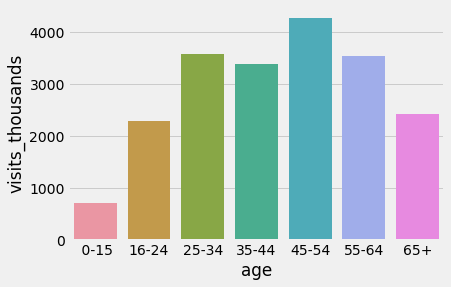

In [254]:
sns.barplot(data=(
    international
    .loc[international.country.isin(['USA', 'Germany', 'Australia', 'France', 'Canada'])]
    .groupby('age')
    .visits_thousands
    .sum()
    .reset_index(name='visits_thousands')
    .head(10)
),
            y='visits_thousands',
            x='age')

<AxesSubplot:xlabel='year', ylabel='total_visits'>

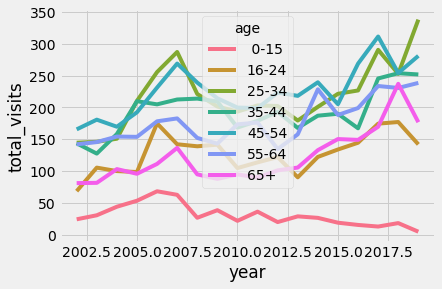

In [256]:
sns.lineplot(data=(
    international
    .loc[international.country.isin(['USA', 'Germany', 'Australia', 'Irish Republic', 'Netherlands'])]
    .groupby(['age', 'year'])
    .visits_thousands
    .sum()
    .reset_index(name='total_visits')
),
            x='year',
            y='total_visits',
            hue='age')

## Look at country - nights

In [219]:
(
    international
    .groupby('country')
    .nights_thousands
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_nights')
    .head(10)
)

country  total_nights
0             USA  62333.850381
1         Germany  38443.839658
2       Australia  25003.528565
3          France  24845.902713
4          Canada  23450.234712
5           Spain  21960.298214
6           Italy  16519.453252
7          Poland  16130.759889
8     Netherlands  14994.874248
9  Irish Republic  10141.095683

<AxesSubplot:xlabel='total_nights', ylabel='country'>

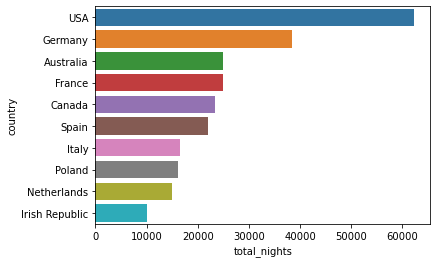

In [220]:
sns.barplot(data=(
    international
    .groupby('country')
    .nights_thousands
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_nights')
    .head(10)
),
            x='total_nights',
            y='country')

<AxesSubplot:xlabel='year', ylabel='total_nights'>

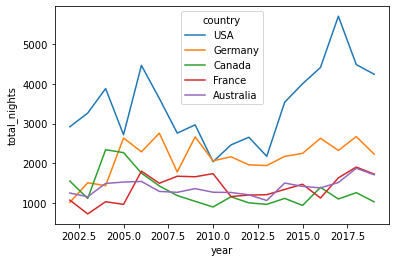

In [221]:
sns.lineplot(data=(
    international
    .loc[international.country.isin(['USA', 'Germany', 'Australia', 'France', 'Canada'])]
    .groupby(['country', 'year'])
    .nights_thousands
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_nights')
),
            x='year',
            y='total_nights',
            hue='country')

<AxesSubplot:xlabel='visits_thousands', ylabel='expenditure_millions'>

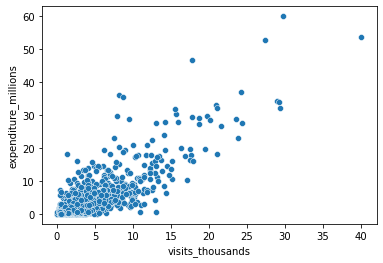

In [222]:
sns.scatterplot(data=international.loc[international.country == 'USA', :],
               x='visits_thousands',
               y='expenditure_millions')

<AxesSubplot:xlabel='purpose', ylabel='total_expenditure'>

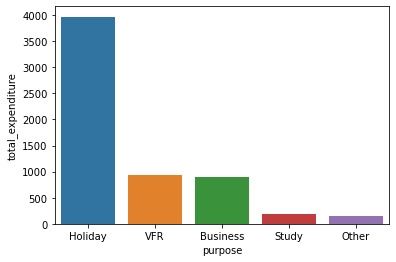

In [223]:
sns.barplot(data=(
    international
    .loc[international.country == 'USA', :]
    .groupby(['purpose'])
    .expenditure_millions
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='purpose',
            y='total_expenditure')

In [224]:
(
    international
    .loc[international.country == 'USA', :]
    .groupby(['purpose'])
    .expenditure_millions
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
)

purpose  total_expenditure
0   Holiday        3967.629282
1       VFR         942.517325
2  Business         900.765542
3     Study         182.045767
4     Other         147.045845

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

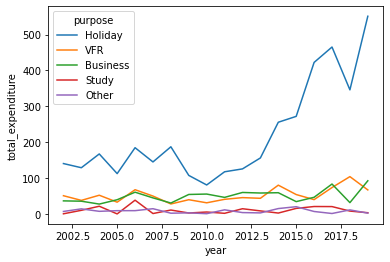

In [225]:
sns.lineplot(data=(
    international
    .loc[international.country == 'USA', :]
    .groupby(['purpose', 'year'])
    .expenditure_millions
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='year',
            y='total_expenditure',
            hue='purpose')

<AxesSubplot:xlabel='mode', ylabel='total_expenditure'>

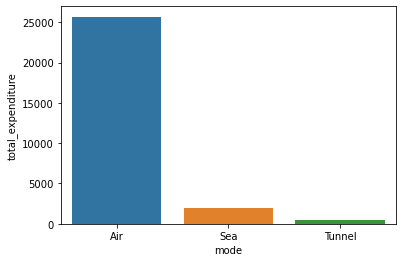

In [226]:
sns.barplot(data=(
    international
    .groupby('mode')
    .expenditure_millions
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            y='total_expenditure',
            x='mode')

<AxesSubplot:xlabel='year', ylabel='total_expenditure'>

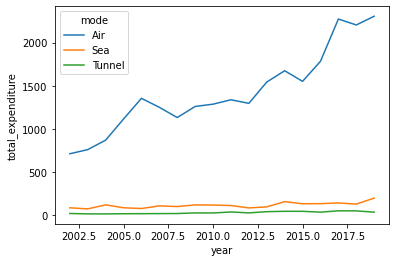

In [227]:
sns.lineplot(data=(
    international
    .groupby(['mode', 'year'])
    .expenditure_millions
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            y='total_expenditure',
            x='year',
            hue='mode')

<AxesSubplot:xlabel='visits_thousands', ylabel='expenditure_millions'>

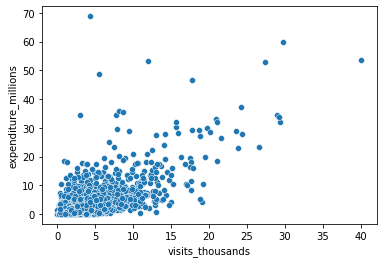

In [230]:
sns.scatterplot(data=(
    international
    .loc[international.country.isin(['USA', 'Germany', 'Australia', 'France', 'Canada'])]
),
               y='expenditure_millions',
               x='visits_thousands')

In [232]:
international.loc[international.country.isin(['USA'])]

year country  purpose mode    duration    age  visits_thousands  \
0      2002     USA  Holiday  Air  4-7 nights   0-15          0.270000   
1      2002     USA  Holiday  Air  4-7 nights  16-24          1.080000   
2      2002     USA  Holiday  Air  4-7 nights  25-34          0.990000   
3      2002     USA  Holiday  Air  4-7 nights  45-54          0.350000   
4      2002     USA  Holiday  Air  4-7 nights    65+          1.660000   
...     ...     ...      ...  ...         ...    ...               ...   
31675  2019     USA      VFR  Air  15+ nights  25-34          4.051227   
31676  2019     USA      VFR  Air  15+ nights  35-44          0.636022   
31677  2019     USA      VFR  Air  15+ nights  55-64          0.413906   
31678  2019     USA      VFR  Air  15+ nights    65+          0.413906   
31679  2019     USA    Other  Air  15+ nights  35-44          0.533417   

       nights_thousands  expenditure_millions  
0              1.600000              0.160000  
1              4.620000              0.250000  
2              5.030000              0.810000  
3              1.800000              0.080000  
4             10.090000              0.620000  
...                 ...                   ...  
31675         33.920169              0.630585  
31676          1.996985              0.079477  
31677          2.599171              0.651369  
31678          2.165976              0.037496  
31679          2.223233              0.001605  

[3609 rows x 9 columns]

In [233]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [239]:
kmeans = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300
)

In [240]:
kmeans.fit(international.loc[international.country == 'USA', ['visits_thousands', 'expenditure_millions']])

KMeans(init='random', n_clusters=4)

In [241]:
kmeans.inertia_

14868.775275099637

In [242]:
kmeans.cluster_centers_

array([[19.99771962, 33.33356797],
       [ 4.37472022,  3.38042003],
       [ 1.00122959,  0.47975315],
       [ 9.54629244, 12.27828938]])

In [243]:
kmeans.n_iter_

21

In [244]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300
}

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(international.loc[international.country == 'USA', ['visits_thousands', 'expenditure_millions']])
    sse.append(kmeans.inertia_)

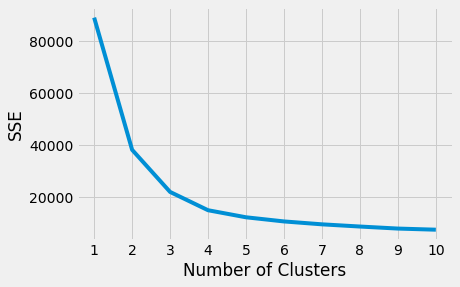

In [245]:
plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [246]:
kl = KneeLocator(
    range(1, 11), sse, curve='convex', direction='decreasing'
)

kl.elbow

3